In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ddm import Model, Sample
from ddm import Model
from ddm.models import DriftConstant, NoiseConstant, BoundConstant, OverlayNonDecision, ICRange
from ddm.functions import fit_adjust_model, display_model
from ddm import Fittable
from ddm.models import LossRobustBIC, LossRobustLikelihood, LossSquaredError
from ddm.functions import fit_adjust_model, fit_model
import seaborn as sns
import pickle

In [18]:
from ddm import set_N_cpus
set_N_cpus(8)

  2.081255163261618to 1.  Try decreasing dt.  If that doesn't eliminate this warning, it may be due to extreme parameter values and/or bugs in your model speficiation. 
to 1.  Try decreasing dt.  If that doesn't eliminate this warning, it may be due to extreme parameter values and/or bugs in your model speficiation.
1.7406828854583705to 1.  Try decreasing dt.  If that doesn't eliminate this warning, it may be due to extreme parameter values and/or bugs in your model speficiation.Warning: renormalizing probability density from

 1.8592448956529013 to 1.  Try decreasing dt.  If that doesn't eliminate this warning, it may be due to extreme parameter values and/or bugs in your model speficiation.
 1.0117407841463493 to 1.  Try decreasing dt.  If that doesn't eliminate this warning, it may be due to extreme parameter values and/or bugs in your model speficiation.Warning: renormalizing probability density from 1.012340940326857 to 1.  Try decreasing dt.  If that doesn't eliminate this warnin

In [110]:
incorrect_thresold = np.array([np.pi/9])
model_fits_4param = np.zeros((14, 12, len(incorrect_thresold)), dtype = object)

for participant in range(14):
    noise_fittable=Fittable(minval = 0, maxval = 10)
    ter_fittable=Fittable(minval=0, maxval=5)
    for block in range(12):
        for ic in range(len(incorrect_thresold)):
            df_rt = pd.read_csv(open('RTs.csv'))
            df_error = pd.read_csv(open('Angular_errors.csv'))

            df_rt['Correct'] = 0
            df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
            df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0

            df_rt = df_rt[df_rt['participant_id'] == participant]

            df_rt = df_rt[df_rt["ITs"] > .001]
            df_rt = df_rt[df_rt["ITs"] < 5]
            df_rt = df_rt.drop(['Trial', 'Unnamed: 0', 'participant_id', 'condition', 'MTs'], axis = 1)

            samp = Sample.from_pandas_dataframe(df_rt[df_rt['block'] == block], rt_column_name="ITs", correct_column_name="Correct")
            model_fit = Model(name='Simple model (fitted)',
                          drift=DriftConstant(drift=Fittable(minval=-20, maxval=20)),
                          noise=NoiseConstant(noise=Fittable(minval = 0, maxval = 5)),                      
                          bound=BoundConstant(B=Fittable(minval = 0, maxval = 20)),
                          overlay=OverlayNonDecision(nondectime=Fittable(minval = 0, maxval = 1)),
                          dx=.001, dt=.01, T_dur=5)

            try:
                fit_adjust_model(samp, model_fit,
                             fitting_method="differential_evolution",
                             lossfunction=LossRobustLikelihood, verbose=False)
            except:
                print (participant, block)
            model_fits_4param[participant][block][ic] = model_fit

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 18.8304
differential_evolution step 2: f(x)= 1.87986
differential_evolution step 3: f(x)= -0.428464
differential_evolution step 4: f(x)= -1.6836
differential_evolution step 5: f(x)= -1.80648
differential_evolution step 6: f(x)= -1.80648
differential_evolution step 7: f(x)= -1.85931
differential_evolution step 8: f(x)= -1.94714
differential_evolution step 9: f(x)= -1.94714
differential_evolution step 10: f(x)= -2.00378
differential_evolution step 11: f(x)= -2.00874
differential_evolution step 12: f(x)= -2.00874
differential_evolution step 13: f(x)= -2.00874
differential_evolution step 14: f(x)= -2.00874
differential_evolution step 15: f(x)= -2.01305
differential_evolution step 16: f(x)= -2.01305
differential_evolution step 17: f(x)= -2.01305
differential_evolution step 18: f(x)= -2.01305
differential_evolution step 19: f(x)= -2.01305
differential_evolution step 20: f(x)= -2.01305
differential_evolution step 21: f(x)= -2.01321
differential_evolution s

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 107.151
differential_evolution step 2: f(x)= 107.151
differential_evolution step 3: f(x)= 107.151
differential_evolution step 4: f(x)= 107.151
differential_evolution step 5: f(x)= 107.151
differential_evolution step 6: f(x)= 106.618
differential_evolution step 7: f(x)= 105.906
differential_evolution step 8: f(x)= 103.852
differential_evolution step 9: f(x)= 103.852
differential_evolution step 10: f(x)= 103.852
differential_evolution step 11: f(x)= 103.852
differential_evolution step 12: f(x)= 103.852
differential_evolution step 13: f(x)= 103.72
differential_evolution step 14: f(x)= 103.675
differential_evolution step 15: f(x)= 103.675
differential_evolution step 16: f(x)= 103.675
Params [2.55976837e-07 2.90868150e+00 3.19083571e+00 3.84006739e-01] gave 103.67178556995128


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 113.337
differential_evolution step 2: f(x)= 104.717
differential_evolution step 3: f(x)= 104.717
differential_evolution step 4: f(x)= 101.817
differential_evolution step 5: f(x)= 101.817
differential_evolution step 6: f(x)= 100.855
differential_evolution step 7: f(x)= 100.855
differential_evolution step 8: f(x)= 100.855
differential_evolution step 9: f(x)= 100.039
differential_evolution step 10: f(x)= 99.8959
differential_evolution step 11: f(x)= 99.7976
differential_evolution step 12: f(x)= 99.7976
differential_evolution step 13: f(x)= 99.7775
differential_evolution step 14: f(x)= 99.7775
differential_evolution step 15: f(x)= 99.7775
differential_evolution step 16: f(x)= 99.7775
differential_evolution step 17: f(x)= 99.7775
differential_evolution step 18: f(x)= 99.7775
differential_evolution step 19: f(x)= 99.7775
Params [2.60903176 4.85592938 6.057558   0.23321971] gave 99.74277985184057


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 91.2865
differential_evolution step 2: f(x)= 81.6547
differential_evolution step 3: f(x)= 81.6547
differential_evolution step 4: f(x)= 80.4997
differential_evolution step 5: f(x)= 80.4997
differential_evolution step 6: f(x)= 80.4997
differential_evolution step 7: f(x)= 80.4997
differential_evolution step 8: f(x)= 80.4997
differential_evolution step 9: f(x)= 80.4997
differential_evolution step 10: f(x)= 80.4997
differential_evolution step 11: f(x)= 80.4997
differential_evolution step 12: f(x)= 80.4238
differential_evolution step 13: f(x)= 80.4238
differential_evolution step 14: f(x)= 80.4023
differential_evolution step 15: f(x)= 80.3977
differential_evolution step 16: f(x)= 80.3977
Params [4.10355419 4.79751924 6.18012354 0.32928268] gave 80.38230081245865


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 181.185
differential_evolution step 2: f(x)= 145.214
differential_evolution step 3: f(x)= 145.214
differential_evolution step 4: f(x)= 145.214
differential_evolution step 5: f(x)= 144.705
differential_evolution step 6: f(x)= 144.622
differential_evolution step 7: f(x)= 144.108
differential_evolution step 8: f(x)= 144.108
differential_evolution step 9: f(x)= 132.479
differential_evolution step 10: f(x)= 132.479
differential_evolution step 11: f(x)= 132.479
differential_evolution step 12: f(x)= 129.507
differential_evolution step 13: f(x)= 129.507
differential_evolution step 14: f(x)= 127.502
differential_evolution step 15: f(x)= 127.502
differential_evolution step 16: f(x)= 127.016
differential_evolution step 17: f(x)= 127.016
differential_evolution step 18: f(x)= 127.016
differential_evolution step 19: f(x)= 126.988
differential_evolution step 20: f(x)= 126.988
differential_evolution step 21: f(x)= 126.958
differential_evolution step 22: f(x)= 126.9

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 166.321
differential_evolution step 2: f(x)= 166.321
differential_evolution step 3: f(x)= 166.321
differential_evolution step 4: f(x)= 115.402
differential_evolution step 5: f(x)= 115.402
differential_evolution step 6: f(x)= 115.402
differential_evolution step 7: f(x)= 115.06
differential_evolution step 8: f(x)= 110.139
differential_evolution step 9: f(x)= 110.139
differential_evolution step 10: f(x)= 110.139
differential_evolution step 11: f(x)= 110.095
differential_evolution step 12: f(x)= 110.095
differential_evolution step 13: f(x)= 110.045
differential_evolution step 14: f(x)= 110.015
differential_evolution step 15: f(x)= 109.959
differential_evolution step 16: f(x)= 109.941
differential_evolution step 17: f(x)= 109.941
differential_evolution step 18: f(x)= 109.941
Params [2.66480588e+00 4.70159580e+00 6.31692193e+00 1.75263406e-03] gave 109.93619168021166


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 123.598
differential_evolution step 2: f(x)= 82.9665
differential_evolution step 3: f(x)= 80.413
differential_evolution step 4: f(x)= 80.413
differential_evolution step 5: f(x)= 78.7929
differential_evolution step 6: f(x)= 78.5087
differential_evolution step 7: f(x)= 78.5087
differential_evolution step 8: f(x)= 78.5087
differential_evolution step 9: f(x)= 78.4239
differential_evolution step 10: f(x)= 78.4239
differential_evolution step 11: f(x)= 78.3821
differential_evolution step 12: f(x)= 78.3793
differential_evolution step 13: f(x)= 78.3506
differential_evolution step 14: f(x)= 78.3506
Params [4.78828058 4.85380717 7.86935447 0.12566816] gave 78.34535541301813


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 107.317
differential_evolution step 2: f(x)= 93.0806
differential_evolution step 3: f(x)= 83.1372
differential_evolution step 4: f(x)= 76.2138
differential_evolution step 5: f(x)= 76.2138
differential_evolution step 6: f(x)= 72.8752
differential_evolution step 7: f(x)= 62.6694
differential_evolution step 8: f(x)= 56.8492
differential_evolution step 9: f(x)= 56.8492
differential_evolution step 10: f(x)= 56.8492
differential_evolution step 11: f(x)= 56.8492
differential_evolution step 12: f(x)= 56.8492
differential_evolution step 13: f(x)= 56.8492
differential_evolution step 14: f(x)= 56.8492
differential_evolution step 15: f(x)= 56.3301
differential_evolution step 16: f(x)= 56.3301
differential_evolution step 17: f(x)= 56.3301
differential_evolution step 18: f(x)= 56.3301
differential_evolution step 19: f(x)= 56.323
differential_evolution step 20: f(x)= 56.323
differential_evolution step 21: f(x)= 56.323
differential_evolution step 22: f(x)= 56.323
d

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 51.5637
differential_evolution step 2: f(x)= 51.5637
differential_evolution step 3: f(x)= 51.5637
differential_evolution step 4: f(x)= 44.2472
differential_evolution step 5: f(x)= 42.0881
differential_evolution step 6: f(x)= 42.0881
differential_evolution step 7: f(x)= 42.0881
differential_evolution step 8: f(x)= 41.9517
differential_evolution step 9: f(x)= 41.2963
differential_evolution step 10: f(x)= 41.2963
differential_evolution step 11: f(x)= 41.1787
differential_evolution step 12: f(x)= 41.1787
differential_evolution step 13: f(x)= 41.1787
differential_evolution step 14: f(x)= 41.1787
differential_evolution step 15: f(x)= 41.1787
differential_evolution step 16: f(x)= 41.1787
differential_evolution step 17: f(x)= 41.1787
differential_evolution step 18: f(x)= 41.1787
differential_evolution step 19: f(x)= 41.1762
Params [6.27070258 4.21569125 5.36592968 0.12975832] gave 41.16384511130127


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 62.2256
differential_evolution step 2: f(x)= 62.2256
differential_evolution step 3: f(x)= 62.2256
differential_evolution step 4: f(x)= 62.2256
differential_evolution step 5: f(x)= 62.2256
differential_evolution step 6: f(x)= 61.4954
differential_evolution step 7: f(x)= 61.2287
differential_evolution step 8: f(x)= 61.2287
differential_evolution step 9: f(x)= 61.2287
differential_evolution step 10: f(x)= 60.6123
differential_evolution step 11: f(x)= 60.0567
differential_evolution step 12: f(x)= 59.9828
differential_evolution step 13: f(x)= 59.9828
differential_evolution step 14: f(x)= 59.9828
differential_evolution step 15: f(x)= 59.7502
differential_evolution step 16: f(x)= 59.7502
differential_evolution step 17: f(x)= 59.7445
differential_evolution step 18: f(x)= 59.7445
differential_evolution step 19: f(x)= 59.7397
differential_evolution step 20: f(x)= 59.7386
Params [2.37583828 2.68619133 2.76726505 0.05939855] gave 59.73010313494546


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 115.412
differential_evolution step 2: f(x)= 83.1867
differential_evolution step 3: f(x)= 83.1867
differential_evolution step 4: f(x)= 82.8165
differential_evolution step 5: f(x)= 82.8165
differential_evolution step 6: f(x)= 82.8165
differential_evolution step 7: f(x)= 78.1409
differential_evolution step 8: f(x)= 76.8219
differential_evolution step 9: f(x)= 76.8219
differential_evolution step 10: f(x)= 76.8219
differential_evolution step 11: f(x)= 76.8219
differential_evolution step 12: f(x)= 76.7877
differential_evolution step 13: f(x)= 76.7877
differential_evolution step 14: f(x)= 76.3934
differential_evolution step 15: f(x)= 76.2257
differential_evolution step 16: f(x)= 76.2257
differential_evolution step 17: f(x)= 76.2257
differential_evolution step 18: f(x)= 76.2257
differential_evolution step 19: f(x)= 76.2247
0 10


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 77.1498
differential_evolution step 2: f(x)= 41.424
differential_evolution step 3: f(x)= 32.8658
differential_evolution step 4: f(x)= 32.8658
differential_evolution step 5: f(x)= 32.8658
differential_evolution step 6: f(x)= 22.5729
differential_evolution step 7: f(x)= 22.5729
differential_evolution step 8: f(x)= 22.5729
differential_evolution step 9: f(x)= 22.5729
differential_evolution step 10: f(x)= 22.5729
differential_evolution step 11: f(x)= 22.5729
differential_evolution step 12: f(x)= 22.5729
differential_evolution step 13: f(x)= 22.5729
differential_evolution step 14: f(x)= 22.5729
differential_evolution step 15: f(x)= 22.5729
differential_evolution step 16: f(x)= 22.5729
differential_evolution step 17: f(x)= 22.5729
differential_evolution step 18: f(x)= 22.5729
differential_evolution step 19: f(x)= 22.5729
differential_evolution step 20: f(x)= 22.5729
differential_evolution step 21: f(x)= 22.5729
differential_evolution step 22: f(x)= 22.572

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= -0.711015
differential_evolution step 2: f(x)= -0.947603
differential_evolution step 3: f(x)= -1.00043
differential_evolution step 4: f(x)= -1.00784
differential_evolution step 5: f(x)= -1.03666
differential_evolution step 6: f(x)= -1.14899
differential_evolution step 7: f(x)= -1.15288
differential_evolution step 8: f(x)= -1.15288
differential_evolution step 9: f(x)= -1.15288
differential_evolution step 10: f(x)= -1.15288
differential_evolution step 11: f(x)= -1.15288
differential_evolution step 12: f(x)= -1.15288
differential_evolution step 13: f(x)= -1.15288
differential_evolution step 14: f(x)= -1.15288
differential_evolution step 15: f(x)= -1.15619
differential_evolution step 16: f(x)= -1.15619
differential_evolution step 17: f(x)= -1.15619
differential_evolution step 18: f(x)= -1.15619
differential_evolution step 19: f(x)= -1.15619
differential_evolution step 20: f(x)= -1.15619
differential_evolution step 21: f(x)= -1.15619
differential_evoluti

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 74.0892
differential_evolution step 2: f(x)= 74.0892
differential_evolution step 3: f(x)= 74.0892
differential_evolution step 4: f(x)= 58.7651
differential_evolution step 5: f(x)= 58.7651
differential_evolution step 6: f(x)= 58.7651
differential_evolution step 7: f(x)= 55.8807
differential_evolution step 8: f(x)= 55.8807
differential_evolution step 9: f(x)= 55.8807
differential_evolution step 10: f(x)= 55.8807
differential_evolution step 11: f(x)= 55.8807
differential_evolution step 12: f(x)= 55.8807
differential_evolution step 13: f(x)= 55.8807
differential_evolution step 14: f(x)= 55.8807
differential_evolution step 15: f(x)= 55.8807
differential_evolution step 16: f(x)= 55.8807
differential_evolution step 17: f(x)= 55.8159
differential_evolution step 18: f(x)= 55.6062
differential_evolution step 19: f(x)= 55.6062
differential_evolution step 20: f(x)= 55.6062
differential_evolution step 21: f(x)= 55.6062
differential_evolution step 22: f(x)= 55.58

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 149.337
differential_evolution step 2: f(x)= 149.337
differential_evolution step 3: f(x)= 110.969
differential_evolution step 4: f(x)= 110.969
differential_evolution step 5: f(x)= 110.969
differential_evolution step 6: f(x)= 110.521
differential_evolution step 7: f(x)= 108.332
differential_evolution step 8: f(x)= 103.655
differential_evolution step 9: f(x)= 102.219
differential_evolution step 10: f(x)= 100.22
differential_evolution step 11: f(x)= 100.129
differential_evolution step 12: f(x)= 100.129
differential_evolution step 13: f(x)= 100.025
differential_evolution step 14: f(x)= 100.025
differential_evolution step 15: f(x)= 100.025
differential_evolution step 16: f(x)= 99.8674
differential_evolution step 17: f(x)= 99.8674
differential_evolution step 18: f(x)= 99.8674
differential_evolution step 19: f(x)= 99.7729
Params [-0.34728234  4.28082326  4.9244568   0.34430058] gave 99.75025809409206


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 91.3281
differential_evolution step 2: f(x)= 75.7345
differential_evolution step 3: f(x)= 70.8572
differential_evolution step 4: f(x)= 70.8572
differential_evolution step 5: f(x)= 68.6832
differential_evolution step 6: f(x)= 68.6832
differential_evolution step 7: f(x)= 68.2031
differential_evolution step 8: f(x)= 68.2031
differential_evolution step 9: f(x)= 67.9725
differential_evolution step 10: f(x)= 67.9725
differential_evolution step 11: f(x)= 67.9725
differential_evolution step 12: f(x)= 67.9725
differential_evolution step 13: f(x)= 67.9725
differential_evolution step 14: f(x)= 67.9589
differential_evolution step 15: f(x)= 67.9589
differential_evolution step 16: f(x)= 67.9589
Params [-4.40124461  3.3249314   9.58679101  0.03431738] gave 67.95471830131162


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 45.5884
differential_evolution step 2: f(x)= 45.5884
differential_evolution step 3: f(x)= 45.5884
differential_evolution step 4: f(x)= 45.5884
differential_evolution step 5: f(x)= 45.5884
differential_evolution step 6: f(x)= 45.587
differential_evolution step 7: f(x)= 45.0544
differential_evolution step 8: f(x)= 45.0313
differential_evolution step 9: f(x)= 45.0313
differential_evolution step 10: f(x)= 44.8621
differential_evolution step 11: f(x)= 44.8621
differential_evolution step 12: f(x)= 44.8505
differential_evolution step 13: f(x)= 44.8346
differential_evolution step 14: f(x)= 44.8346
differential_evolution step 15: f(x)= 44.8346
differential_evolution step 16: f(x)= 44.8346
differential_evolution step 17: f(x)= 44.8346
Params [5.78401875 4.53392222 5.59001405 0.45993593] gave 44.82531853709508


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 56.2869
differential_evolution step 2: f(x)= 56.2869
differential_evolution step 3: f(x)= 56.2869
differential_evolution step 4: f(x)= 55.2158
differential_evolution step 5: f(x)= 54.5428
differential_evolution step 6: f(x)= 54.5428
differential_evolution step 7: f(x)= 54.3662
differential_evolution step 8: f(x)= 54.3178
differential_evolution step 9: f(x)= 54.3178
differential_evolution step 10: f(x)= 54.3178
differential_evolution step 11: f(x)= 54.3178
differential_evolution step 12: f(x)= 54.3178
Params [7.14075686 4.63348602 8.81883458 0.26183779] gave 54.315911782127365


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 124.403
differential_evolution step 2: f(x)= 122.74
differential_evolution step 3: f(x)= 122.74
differential_evolution step 4: f(x)= 122.74
differential_evolution step 5: f(x)= 104.83
differential_evolution step 6: f(x)= 104.83
differential_evolution step 7: f(x)= 102.452
differential_evolution step 8: f(x)= 102.452
differential_evolution step 9: f(x)= 102.398
differential_evolution step 10: f(x)= 102.398
differential_evolution step 11: f(x)= 100.886
differential_evolution step 12: f(x)= 100.186
differential_evolution step 13: f(x)= 99.1376
differential_evolution step 14: f(x)= 99.1376
differential_evolution step 15: f(x)= 99.1376
differential_evolution step 16: f(x)= 99.1376
differential_evolution step 17: f(x)= 99.1376
differential_evolution step 18: f(x)= 99.1376
differential_evolution step 19: f(x)= 99.1376
differential_evolution step 20: f(x)= 99.1376
Params [2.26484902 3.41825548 5.53672769 0.00965985] gave 99.12398265361193


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 117.182
differential_evolution step 2: f(x)= 116.234
differential_evolution step 3: f(x)= 114.2
differential_evolution step 4: f(x)= 112.498
differential_evolution step 5: f(x)= 107.726
differential_evolution step 6: f(x)= 107.726
differential_evolution step 7: f(x)= 106.45
differential_evolution step 8: f(x)= 103.081
differential_evolution step 9: f(x)= 103.081
differential_evolution step 10: f(x)= 102.138
differential_evolution step 11: f(x)= 101.952
differential_evolution step 12: f(x)= 101.866
differential_evolution step 13: f(x)= 101.866
differential_evolution step 14: f(x)= 101.799
differential_evolution step 15: f(x)= 101.799
Params [1.88611115 4.2312308  5.75068783 0.36164788] gave 101.69942948732981


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 93.345
differential_evolution step 2: f(x)= 87.0973
differential_evolution step 3: f(x)= 86.7771
differential_evolution step 4: f(x)= 83.9536
differential_evolution step 5: f(x)= 82.8573
differential_evolution step 6: f(x)= 82.8573
differential_evolution step 7: f(x)= 82.8573
differential_evolution step 8: f(x)= 82.8573
differential_evolution step 9: f(x)= 82.8573
differential_evolution step 10: f(x)= 82.8573
differential_evolution step 11: f(x)= 82.8573
differential_evolution step 12: f(x)= 82.4657
differential_evolution step 13: f(x)= 82.4657
differential_evolution step 14: f(x)= 82.3072
differential_evolution step 15: f(x)= 82.3072
differential_evolution step 16: f(x)= 82.3072
differential_evolution step 17: f(x)= 82.3072
differential_evolution step 18: f(x)= 82.3072
Params [2.88858887 3.37908771 4.36353828 0.64286376] gave 82.27714421510507


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 84.5797
differential_evolution step 2: f(x)= 84.5797
differential_evolution step 3: f(x)= 84.5797
differential_evolution step 4: f(x)= 84.5797
differential_evolution step 5: f(x)= 80.9117
differential_evolution step 6: f(x)= 80.9117
differential_evolution step 7: f(x)= 80.9117
differential_evolution step 8: f(x)= 80.7425
differential_evolution step 9: f(x)= 78.9264
differential_evolution step 10: f(x)= 78.4896
differential_evolution step 11: f(x)= 78.4896
differential_evolution step 12: f(x)= 78.2479
differential_evolution step 13: f(x)= 77.5041
differential_evolution step 14: f(x)= 77.5041
differential_evolution step 15: f(x)= 77.5041
differential_evolution step 16: f(x)= 77.5041
differential_evolution step 17: f(x)= 77.5041
differential_evolution step 18: f(x)= 77.5041
differential_evolution step 19: f(x)= 77.5041
differential_evolution step 20: f(x)= 77.5041
differential_evolution step 21: f(x)= 77.4662
differential_evolution step 22: f(x)= 77.46

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 84.2191
differential_evolution step 2: f(x)= 84.2191
differential_evolution step 3: f(x)= 84.2191
differential_evolution step 4: f(x)= 78.0886
differential_evolution step 5: f(x)= 78.0886
differential_evolution step 6: f(x)= 78.0886
differential_evolution step 7: f(x)= 78.0886
differential_evolution step 8: f(x)= 78.0886
differential_evolution step 9: f(x)= 78.0886
differential_evolution step 10: f(x)= 77.7787
differential_evolution step 11: f(x)= 77.7787
differential_evolution step 12: f(x)= 77.7787
differential_evolution step 13: f(x)= 77.6474
differential_evolution step 14: f(x)= 77.6474
differential_evolution step 15: f(x)= 77.638
differential_evolution step 16: f(x)= 77.6106
differential_evolution step 17: f(x)= 77.6106
differential_evolution step 18: f(x)= 77.6106
Params [4.77430811 4.7263507  6.80509209 0.50650743] gave 77.59326109203913


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 22.0427
differential_evolution step 2: f(x)= 22.0427
differential_evolution step 3: f(x)= 19.8996
differential_evolution step 4: f(x)= 13.2746
differential_evolution step 5: f(x)= 13.2746
differential_evolution step 6: f(x)= 13.2746
differential_evolution step 7: f(x)= 13.2746
differential_evolution step 8: f(x)= 13.2746
differential_evolution step 9: f(x)= 12.8365
differential_evolution step 10: f(x)= 12.2853
differential_evolution step 11: f(x)= 12.2853
differential_evolution step 12: f(x)= 12.2853
differential_evolution step 13: f(x)= 12.2853
differential_evolution step 14: f(x)= 12.2853
differential_evolution step 15: f(x)= 12.2853
differential_evolution step 16: f(x)= 12.2744
differential_evolution step 17: f(x)= 12.2744
differential_evolution step 18: f(x)= 12.1985
differential_evolution step 19: f(x)= 12.1985
differential_evolution step 20: f(x)= 12.1871
differential_evolution step 21: f(x)= 12.1871
differential_evolution step 22: f(x)= 12.18

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= -0
Params [9.1637884  4.43376039 9.1827338  0.97156708] gave -0.0


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 50.4179
differential_evolution step 2: f(x)= 50.4179
differential_evolution step 3: f(x)= 47.1484
differential_evolution step 4: f(x)= 47.1484
differential_evolution step 5: f(x)= 47.1484
differential_evolution step 6: f(x)= 46.2825
differential_evolution step 7: f(x)= 46.2502
differential_evolution step 8: f(x)= 46.2502
differential_evolution step 9: f(x)= 45.3231
differential_evolution step 10: f(x)= 45.3231
differential_evolution step 11: f(x)= 45.3231
differential_evolution step 12: f(x)= 45.3231
differential_evolution step 13: f(x)= 45.3231
differential_evolution step 14: f(x)= 45.3098
differential_evolution step 15: f(x)= 45.3098
differential_evolution step 16: f(x)= 45.1761
differential_evolution step 17: f(x)= 45.1761
differential_evolution step 18: f(x)= 45.1066
differential_evolution step 19: f(x)= 45.0824
differential_evolution step 20: f(x)= 45.0824
differential_evolution step 21: f(x)= 45.0824
differential_evolution step 22: f(x)= 45.08

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 72.1129
differential_evolution step 2: f(x)= 46.3752
differential_evolution step 3: f(x)= 46.2239
differential_evolution step 4: f(x)= 43.1578
differential_evolution step 5: f(x)= 43.1578
differential_evolution step 6: f(x)= 43.1578
differential_evolution step 7: f(x)= 43.1578
differential_evolution step 8: f(x)= 43.1578
differential_evolution step 9: f(x)= 42.5854
differential_evolution step 10: f(x)= 42.1965
differential_evolution step 11: f(x)= 42.1965
differential_evolution step 12: f(x)= 42.1965
differential_evolution step 13: f(x)= 42.1578
differential_evolution step 14: f(x)= 42.0935
differential_evolution step 15: f(x)= 42.0935
differential_evolution step 16: f(x)= 42.0935
differential_evolution step 17: f(x)= 42.0935
differential_evolution step 18: f(x)= 42.0935
Params [-6.57770054  4.23609346  6.19084108  0.45785125] gave 42.093116410463224


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 15.3891
differential_evolution step 2: f(x)= 14.4575
differential_evolution step 3: f(x)= 14.4575
differential_evolution step 4: f(x)= 14.4575
differential_evolution step 5: f(x)= 14.4575
differential_evolution step 6: f(x)= 14.3169
differential_evolution step 7: f(x)= 14.3169
differential_evolution step 8: f(x)= 14.3169
differential_evolution step 9: f(x)= 12.83
differential_evolution step 10: f(x)= 12.83
differential_evolution step 11: f(x)= 12.83
differential_evolution step 12: f(x)= 12.6059
differential_evolution step 13: f(x)= 12.6059
differential_evolution step 14: f(x)= 12.6059
differential_evolution step 15: f(x)= 12.6059
differential_evolution step 16: f(x)= 12.6059
differential_evolution step 17: f(x)= 12.5231
differential_evolution step 18: f(x)= 12.5231
differential_evolution step 19: f(x)= 12.5231
differential_evolution step 20: f(x)= 12.4771
differential_evolution step 21: f(x)= 12.4771
differential_evolution step 22: f(x)= 12.4771
dif

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 32.9913
differential_evolution step 2: f(x)= 27.414
differential_evolution step 3: f(x)= 24.9184
differential_evolution step 4: f(x)= 23.7308
differential_evolution step 5: f(x)= 23.7308
differential_evolution step 6: f(x)= 23.7308
differential_evolution step 7: f(x)= 23.2399
differential_evolution step 8: f(x)= 23.2399
differential_evolution step 9: f(x)= 23.2399
differential_evolution step 10: f(x)= 23.2399
differential_evolution step 11: f(x)= 23.0436
differential_evolution step 12: f(x)= 23.0436
differential_evolution step 13: f(x)= 23.0436
differential_evolution step 14: f(x)= 23.0299
differential_evolution step 15: f(x)= 23.0299
differential_evolution step 16: f(x)= 23.0299
Params [-7.94697983  3.93702143  5.9738942   0.57929575] gave 23.021280402752605


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 22.5621
differential_evolution step 2: f(x)= 15.823
differential_evolution step 3: f(x)= 15.823
differential_evolution step 4: f(x)= 15.823
differential_evolution step 5: f(x)= 15.823
differential_evolution step 6: f(x)= 15.823
differential_evolution step 7: f(x)= 15.823
differential_evolution step 8: f(x)= 15.823
differential_evolution step 9: f(x)= 15.823
differential_evolution step 10: f(x)= 15.823
differential_evolution step 11: f(x)= 15.823
differential_evolution step 12: f(x)= 15.823
differential_evolution step 13: f(x)= 15.823
differential_evolution step 14: f(x)= 15.823
differential_evolution step 15: f(x)= 15.6846
differential_evolution step 16: f(x)= 15.5697
differential_evolution step 17: f(x)= 15.5577
differential_evolution step 18: f(x)= 15.5096
differential_evolution step 19: f(x)= 15.5096
differential_evolution step 20: f(x)= 15.4724
differential_evolution step 21: f(x)= 15.4724
differential_evolution step 22: f(x)= 15.4456
differenti

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 32.6921
differential_evolution step 2: f(x)= 27.0602
differential_evolution step 3: f(x)= 16.2993
differential_evolution step 4: f(x)= 16.2993
differential_evolution step 5: f(x)= 16.2993
differential_evolution step 6: f(x)= 16.2993
differential_evolution step 7: f(x)= 12.8796
differential_evolution step 8: f(x)= 12.8796
differential_evolution step 9: f(x)= 12.1023
differential_evolution step 10: f(x)= 9.80944
differential_evolution step 11: f(x)= 9.80944
differential_evolution step 12: f(x)= 9.80944
differential_evolution step 13: f(x)= 9.56404
differential_evolution step 14: f(x)= 9.56404
differential_evolution step 15: f(x)= 9.28348
differential_evolution step 16: f(x)= 8.93504
differential_evolution step 17: f(x)= 8.88221
differential_evolution step 18: f(x)= 8.88221
differential_evolution step 19: f(x)= 8.88221
differential_evolution step 20: f(x)= 8.88221
differential_evolution step 21: f(x)= 8.88221
differential_evolution step 22: f(x)= 8.882

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= -1.94966
differential_evolution step 2: f(x)= -4.3027
differential_evolution step 3: f(x)= -4.3027
differential_evolution step 4: f(x)= -4.3027
differential_evolution step 5: f(x)= -4.3027
differential_evolution step 6: f(x)= -4.3027
differential_evolution step 7: f(x)= -4.36318
differential_evolution step 8: f(x)= -4.36318
differential_evolution step 9: f(x)= -4.44915
differential_evolution step 10: f(x)= -4.51658
differential_evolution step 11: f(x)= -4.51658
differential_evolution step 12: f(x)= -4.51658
differential_evolution step 13: f(x)= -4.51658
differential_evolution step 14: f(x)= -4.51658
differential_evolution step 15: f(x)= -4.53027
differential_evolution step 16: f(x)= -4.53027
differential_evolution step 17: f(x)= -4.53403
differential_evolution step 18: f(x)= -4.54624
differential_evolution step 19: f(x)= -4.54624
differential_evolution step 20: f(x)= -4.54624
differential_evolution step 21: f(x)= -4.54624
differential_evolution step

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= -6.63588
differential_evolution step 2: f(x)= -6.63588
differential_evolution step 3: f(x)= -7.25366
differential_evolution step 4: f(x)= -8.64293
differential_evolution step 5: f(x)= -8.79027
differential_evolution step 6: f(x)= -9.13841
differential_evolution step 7: f(x)= -9.13841
differential_evolution step 8: f(x)= -9.13841
differential_evolution step 9: f(x)= -9.21765
differential_evolution step 10: f(x)= -9.21765
differential_evolution step 11: f(x)= -9.21765
differential_evolution step 12: f(x)= -9.26937
differential_evolution step 13: f(x)= -9.26937
differential_evolution step 14: f(x)= -9.26937
differential_evolution step 15: f(x)= -9.26937
differential_evolution step 16: f(x)= -9.26937
differential_evolution step 17: f(x)= -9.29797
differential_evolution step 18: f(x)= -9.29797
differential_evolution step 19: f(x)= -9.29797
differential_evolution step 20: f(x)= -9.29797
differential_evolution step 21: f(x)= -9.29797
differential_evolution

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 3.36411
differential_evolution step 2: f(x)= 3.36411
differential_evolution step 3: f(x)= 3.36411
differential_evolution step 4: f(x)= 3.36411
differential_evolution step 5: f(x)= 3.36411
differential_evolution step 6: f(x)= 2.27919
differential_evolution step 7: f(x)= 2.27919
differential_evolution step 8: f(x)= 1.69787
differential_evolution step 9: f(x)= 1.69787
differential_evolution step 10: f(x)= 1.69787
differential_evolution step 11: f(x)= 1.69787
differential_evolution step 12: f(x)= 1.69787
differential_evolution step 13: f(x)= 1.5886
differential_evolution step 14: f(x)= 1.4624
differential_evolution step 15: f(x)= 1.456
differential_evolution step 16: f(x)= 1.456
differential_evolution step 17: f(x)= 1.456
differential_evolution step 18: f(x)= 1.38384
differential_evolution step 19: f(x)= 1.38384
differential_evolution step 20: f(x)= 1.38384
differential_evolution step 21: f(x)= 1.38384
differential_evolution step 22: f(x)= 1.38384
diffe

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 5.7117
differential_evolution step 2: f(x)= 5.32908
differential_evolution step 3: f(x)= 2.93375
differential_evolution step 4: f(x)= 2.93375
differential_evolution step 5: f(x)= 2.93375
differential_evolution step 6: f(x)= 2.9309
differential_evolution step 7: f(x)= 2.20068
differential_evolution step 8: f(x)= 2.20068
differential_evolution step 9: f(x)= 2.20068
differential_evolution step 10: f(x)= 1.67095
differential_evolution step 11: f(x)= 1.38328
differential_evolution step 12: f(x)= 1.38328
differential_evolution step 13: f(x)= 1.38328
differential_evolution step 14: f(x)= 1.29845
differential_evolution step 15: f(x)= 1.29845
differential_evolution step 16: f(x)= 1.28871
differential_evolution step 17: f(x)= 1.28871
differential_evolution step 18: f(x)= 1.28871
differential_evolution step 19: f(x)= 1.28162
differential_evolution step 20: f(x)= 1.26071
differential_evolution step 21: f(x)= 1.26071
differential_evolution step 22: f(x)= 1.26071

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 12.4548
differential_evolution step 2: f(x)= 12.4548
differential_evolution step 3: f(x)= 6.33731
differential_evolution step 4: f(x)= 6.33731
differential_evolution step 5: f(x)= 6.33731
differential_evolution step 6: f(x)= 6.33731
differential_evolution step 7: f(x)= 6.33731
differential_evolution step 8: f(x)= 5.88158
differential_evolution step 9: f(x)= 5.88158
differential_evolution step 10: f(x)= 5.83581
differential_evolution step 11: f(x)= 5.83581
differential_evolution step 12: f(x)= 5.83581
differential_evolution step 13: f(x)= 5.7786
differential_evolution step 14: f(x)= 5.76366
differential_evolution step 15: f(x)= 5.76366
differential_evolution step 16: f(x)= 5.76366
differential_evolution step 17: f(x)= 5.76366
differential_evolution step 18: f(x)= 5.72887
differential_evolution step 19: f(x)= 5.72887
differential_evolution step 20: f(x)= 5.71388
differential_evolution step 21: f(x)= 5.71388
differential_evolution step 22: f(x)= 5.7138

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 20.0594
differential_evolution step 2: f(x)= -2.03116
differential_evolution step 3: f(x)= -2.03116
differential_evolution step 4: f(x)= -2.44187
differential_evolution step 5: f(x)= -2.50142
differential_evolution step 6: f(x)= -4.22187
differential_evolution step 7: f(x)= -4.22187
differential_evolution step 8: f(x)= -5.92594
differential_evolution step 9: f(x)= -6.16031
differential_evolution step 10: f(x)= -6.16031
differential_evolution step 11: f(x)= -6.8984
differential_evolution step 12: f(x)= -6.8984
differential_evolution step 13: f(x)= -6.8984
differential_evolution step 14: f(x)= -7.0683
differential_evolution step 15: f(x)= -7.0683
differential_evolution step 16: f(x)= -7.09065
differential_evolution step 17: f(x)= -7.09065
differential_evolution step 18: f(x)= -7.09065
differential_evolution step 19: f(x)= -7.09065
differential_evolution step 20: f(x)= -7.09065
differential_evolution step 21: f(x)= -7.09433
differential_evolution step 

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 14.2045
differential_evolution step 2: f(x)= 12.9265
differential_evolution step 3: f(x)= 12.9265
differential_evolution step 4: f(x)= 12.9265
differential_evolution step 5: f(x)= 12.4849
differential_evolution step 6: f(x)= 11.6152
differential_evolution step 7: f(x)= 11.6152
differential_evolution step 8: f(x)= 10.8693
differential_evolution step 9: f(x)= 10.485
differential_evolution step 10: f(x)= 10.485
differential_evolution step 11: f(x)= 10.4437
differential_evolution step 12: f(x)= 10.4419
differential_evolution step 13: f(x)= 10.4419
differential_evolution step 14: f(x)= 10.4419
differential_evolution step 15: f(x)= 10.4419
differential_evolution step 16: f(x)= 10.4419
differential_evolution step 17: f(x)= 10.4263
differential_evolution step 18: f(x)= 10.4263
differential_evolution step 19: f(x)= 10.4263
differential_evolution step 20: f(x)= 10.4263
differential_evolution step 21: f(x)= 10.4249
differential_evolution step 22: f(x)= 10.4249

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 84.8351
differential_evolution step 2: f(x)= 84.8351
differential_evolution step 3: f(x)= 84.8351
differential_evolution step 4: f(x)= 78.0932
differential_evolution step 5: f(x)= 70.4546
differential_evolution step 6: f(x)= 70.4546
differential_evolution step 7: f(x)= 70.4546
differential_evolution step 8: f(x)= 69.3084
differential_evolution step 9: f(x)= 67.6314
differential_evolution step 10: f(x)= 67.6314
differential_evolution step 11: f(x)= 66.8455
differential_evolution step 12: f(x)= 66.8455
differential_evolution step 13: f(x)= 66.8455
differential_evolution step 14: f(x)= 66.8455
differential_evolution step 15: f(x)= 66.7189
differential_evolution step 16: f(x)= 66.2435
differential_evolution step 17: f(x)= 66.2435
differential_evolution step 18: f(x)= 66.2435
differential_evolution step 19: f(x)= 66.2435
differential_evolution step 20: f(x)= 66.2435
differential_evolution step 21: f(x)= 66.1232
differential_evolution step 22: f(x)= 66.12

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 41.8538
differential_evolution step 2: f(x)= 41.8538
differential_evolution step 3: f(x)= 41.8538
differential_evolution step 4: f(x)= 37.3238
differential_evolution step 5: f(x)= 33.5548
differential_evolution step 6: f(x)= 33.5548
differential_evolution step 7: f(x)= 33.5548
differential_evolution step 8: f(x)= 33.5548
differential_evolution step 9: f(x)= 31.7139
differential_evolution step 10: f(x)= 31.7139
differential_evolution step 11: f(x)= 31.7139
differential_evolution step 12: f(x)= 31.2674
differential_evolution step 13: f(x)= 31.2674
differential_evolution step 14: f(x)= 31.2674
differential_evolution step 15: f(x)= 31.2674
differential_evolution step 16: f(x)= 31.0111
differential_evolution step 17: f(x)= 30.9649
differential_evolution step 18: f(x)= 30.9316
differential_evolution step 19: f(x)= 30.9316
differential_evolution step 20: f(x)= 30.9307
differential_evolution step 21: f(x)= 30.9307
differential_evolution step 22: f(x)= 30.92

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 42.4311
differential_evolution step 2: f(x)= 41.5188
differential_evolution step 3: f(x)= 41.5188
differential_evolution step 4: f(x)= 30.9857
differential_evolution step 5: f(x)= 27.2932
differential_evolution step 6: f(x)= 27.2932
differential_evolution step 7: f(x)= 27.2932
differential_evolution step 8: f(x)= 27.2932
differential_evolution step 9: f(x)= 27.2932
differential_evolution step 10: f(x)= 27.2932
differential_evolution step 11: f(x)= 27.2932
differential_evolution step 12: f(x)= 27.2932
differential_evolution step 13: f(x)= 27.2932
differential_evolution step 14: f(x)= 27.2932
differential_evolution step 15: f(x)= 27.129
differential_evolution step 16: f(x)= 27.086
differential_evolution step 17: f(x)= 27.086
differential_evolution step 18: f(x)= 27.086
differential_evolution step 19: f(x)= 27.0474
differential_evolution step 20: f(x)= 27.0474
differential_evolution step 21: f(x)= 27.0474
differential_evolution step 22: f(x)= 27.0474
d

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 87.4207
differential_evolution step 2: f(x)= 76.088
differential_evolution step 3: f(x)= 75.6778
differential_evolution step 4: f(x)= 75.6778
differential_evolution step 5: f(x)= 75.419
differential_evolution step 6: f(x)= 74.5367
differential_evolution step 7: f(x)= 74.4377
differential_evolution step 8: f(x)= 74.4377
differential_evolution step 9: f(x)= 74.4377
differential_evolution step 10: f(x)= 74.4369
differential_evolution step 11: f(x)= 74.4369
differential_evolution step 12: f(x)= 74.3219
differential_evolution step 13: f(x)= 74.2818
differential_evolution step 14: f(x)= 74.257
differential_evolution step 15: f(x)= 74.257
differential_evolution step 16: f(x)= 74.2353
differential_evolution step 17: f(x)= 74.2353
differential_evolution step 18: f(x)= 74.2353
differential_evolution step 19: f(x)= 74.2268
differential_evolution step 20: f(x)= 74.2268
differential_evolution step 21: f(x)= 74.2268
Params [-8.93368276  4.76715741  7.12389175  0.

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 20.3106
differential_evolution step 2: f(x)= 20.3106
differential_evolution step 3: f(x)= 14.3871
differential_evolution step 4: f(x)= 14.3871
differential_evolution step 5: f(x)= 14.3871
differential_evolution step 6: f(x)= 14.3871
differential_evolution step 7: f(x)= 14.3871
differential_evolution step 8: f(x)= 14.3871
differential_evolution step 9: f(x)= 14.3871
differential_evolution step 10: f(x)= 14.3871
differential_evolution step 11: f(x)= 14.2373
differential_evolution step 12: f(x)= 14.2373
differential_evolution step 13: f(x)= 14.2194
differential_evolution step 14: f(x)= 14.1933
differential_evolution step 15: f(x)= 14.1398
differential_evolution step 16: f(x)= 14.1398
differential_evolution step 17: f(x)= 14.1398
differential_evolution step 18: f(x)= 14.1398
differential_evolution step 19: f(x)= 14.1233
differential_evolution step 20: f(x)= 14.1233
differential_evolution step 21: f(x)= 14.1221
differential_evolution step 22: f(x)= 14.11

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 66.5522
differential_evolution step 2: f(x)= 48.8331
differential_evolution step 3: f(x)= 48.8331
differential_evolution step 4: f(x)= 48.8331
differential_evolution step 5: f(x)= 48.8331
differential_evolution step 6: f(x)= 48.8331
differential_evolution step 7: f(x)= 48.8331
differential_evolution step 8: f(x)= 48.8331
differential_evolution step 9: f(x)= 48.2476
differential_evolution step 10: f(x)= 48.2476
differential_evolution step 11: f(x)= 48.1775
differential_evolution step 12: f(x)= 48.1775
differential_evolution step 13: f(x)= 48.1775
differential_evolution step 14: f(x)= 48.1775
differential_evolution step 15: f(x)= 48.0821
differential_evolution step 16: f(x)= 48.0042
differential_evolution step 17: f(x)= 48.0042
differential_evolution step 18: f(x)= 47.9337
differential_evolution step 19: f(x)= 47.9337
differential_evolution step 20: f(x)= 47.9337
differential_evolution step 21: f(x)= 47.9337
differential_evolution step 22: f(x)= 47.93

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 41.4659
differential_evolution step 2: f(x)= 41.4659
differential_evolution step 3: f(x)= 41.4659
differential_evolution step 4: f(x)= 40.2061
differential_evolution step 5: f(x)= 40.2061
differential_evolution step 6: f(x)= 40.2061
differential_evolution step 7: f(x)= 40.2061
differential_evolution step 8: f(x)= 40.1909
differential_evolution step 9: f(x)= 39.8565
differential_evolution step 10: f(x)= 39.8565
differential_evolution step 11: f(x)= 39.8565
differential_evolution step 12: f(x)= 39.8565
differential_evolution step 13: f(x)= 39.8392
differential_evolution step 14: f(x)= 39.8392
differential_evolution step 15: f(x)= 39.8392
differential_evolution step 16: f(x)= 39.8392
differential_evolution step 17: f(x)= 39.8392
Params [-8.29107039  4.12730523  9.57083649  0.03757099] gave 39.838354591782974


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 147.157
differential_evolution step 2: f(x)= 124.804
differential_evolution step 3: f(x)= 124.804
differential_evolution step 4: f(x)= 123.551
differential_evolution step 5: f(x)= 123.551
differential_evolution step 6: f(x)= 110.816
differential_evolution step 7: f(x)= 110.25
differential_evolution step 8: f(x)= 110.25
differential_evolution step 9: f(x)= 109.502
differential_evolution step 10: f(x)= 109.23
differential_evolution step 11: f(x)= 108.795
differential_evolution step 12: f(x)= 108.795
differential_evolution step 13: f(x)= 108.649
differential_evolution step 14: f(x)= 108.611
differential_evolution step 15: f(x)= 108.611
differential_evolution step 16: f(x)= 108.611
Params [-0.99414913  4.76245676  5.58427578  0.2445911 ] gave 108.58279105346853


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 83.3173
differential_evolution step 2: f(x)= 65.6379
differential_evolution step 3: f(x)= 65.6379
differential_evolution step 4: f(x)= 65.6379
differential_evolution step 5: f(x)= 61.5411
differential_evolution step 6: f(x)= 56.6262
differential_evolution step 7: f(x)= 53.068
differential_evolution step 8: f(x)= 52.8101
differential_evolution step 9: f(x)= 52.8101
differential_evolution step 10: f(x)= 51.9383
differential_evolution step 11: f(x)= 51.9383
differential_evolution step 12: f(x)= 51.9383
differential_evolution step 13: f(x)= 51.9383
differential_evolution step 14: f(x)= 51.6055
differential_evolution step 15: f(x)= 51.6055
differential_evolution step 16: f(x)= 51.5443
differential_evolution step 17: f(x)= 51.5443
differential_evolution step 18: f(x)= 51.5426
differential_evolution step 19: f(x)= 51.5426
differential_evolution step 20: f(x)= 51.5418
Params [4.82035514 4.81349512 4.61001356 0.6695004 ] gave 51.53969653833036


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 44.4704
differential_evolution step 2: f(x)= 44.4704
differential_evolution step 3: f(x)= 44.4704
differential_evolution step 4: f(x)= 44.4704
differential_evolution step 5: f(x)= 44.4704
differential_evolution step 6: f(x)= 37.6798
differential_evolution step 7: f(x)= 37.6798
differential_evolution step 8: f(x)= 37.6798
differential_evolution step 9: f(x)= 37.6798
differential_evolution step 10: f(x)= 37.6798
differential_evolution step 11: f(x)= 37.6798
differential_evolution step 12: f(x)= 37.6798
differential_evolution step 13: f(x)= 37.6798
differential_evolution step 14: f(x)= 37.6798
differential_evolution step 15: f(x)= 37.6798
differential_evolution step 16: f(x)= 37.6798
differential_evolution step 17: f(x)= 37.6324
differential_evolution step 18: f(x)= 37.5699
differential_evolution step 19: f(x)= 37.5158
differential_evolution step 20: f(x)= 37.5042
differential_evolution step 21: f(x)= 37.5042
differential_evolution step 22: f(x)= 37.50

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 29.2766
differential_evolution step 2: f(x)= 29.2766
differential_evolution step 3: f(x)= 4.18564
differential_evolution step 4: f(x)= 4.18564
differential_evolution step 5: f(x)= 3.48469
differential_evolution step 6: f(x)= -1.18741
differential_evolution step 7: f(x)= -1.88498
differential_evolution step 8: f(x)= -1.88498
differential_evolution step 9: f(x)= -1.88498
differential_evolution step 10: f(x)= -1.88498
differential_evolution step 11: f(x)= -1.88498
differential_evolution step 12: f(x)= -1.88498
differential_evolution step 13: f(x)= -1.88498
differential_evolution step 14: f(x)= -1.98685
differential_evolution step 15: f(x)= -1.98685
differential_evolution step 16: f(x)= -1.98685
differential_evolution step 17: f(x)= -1.98685
differential_evolution step 18: f(x)= -1.99539
differential_evolution step 19: f(x)= -1.99539
differential_evolution step 20: f(x)= -2.00593
differential_evolution step 21: f(x)= -2.01265
differential_evolution step

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 96.2037
differential_evolution step 2: f(x)= 96.2037
differential_evolution step 3: f(x)= 80.6251
differential_evolution step 4: f(x)= 80.6251
differential_evolution step 5: f(x)= 77.0394
differential_evolution step 6: f(x)= 77.0394
differential_evolution step 7: f(x)= 76.1035
differential_evolution step 8: f(x)= 76.1035
differential_evolution step 9: f(x)= 76.0849
differential_evolution step 10: f(x)= 76.0849
differential_evolution step 11: f(x)= 76.0849
differential_evolution step 12: f(x)= 76.0144
differential_evolution step 13: f(x)= 75.827
differential_evolution step 14: f(x)= 75.721
differential_evolution step 15: f(x)= 75.721
differential_evolution step 16: f(x)= 75.721
differential_evolution step 17: f(x)= 75.721
differential_evolution step 18: f(x)= 75.721
differential_evolution step 19: f(x)= 75.721
differential_evolution step 20: f(x)= 75.721
differential_evolution step 21: f(x)= 75.721
differential_evolution step 22: f(x)= 75.7137
Params

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 53.0874
differential_evolution step 2: f(x)= 53.0874
differential_evolution step 3: f(x)= 53.0874
differential_evolution step 4: f(x)= 50.5493
differential_evolution step 5: f(x)= 49.2501
differential_evolution step 6: f(x)= 49.2501
differential_evolution step 7: f(x)= 49.2501
differential_evolution step 8: f(x)= 48.1569
differential_evolution step 9: f(x)= 48.1569
differential_evolution step 10: f(x)= 48.1415
differential_evolution step 11: f(x)= 47.2776
differential_evolution step 12: f(x)= 47.2776
differential_evolution step 13: f(x)= 47.2524
differential_evolution step 14: f(x)= 47.1991
differential_evolution step 15: f(x)= 47.1735
differential_evolution step 16: f(x)= 47.1735
differential_evolution step 17: f(x)= 47.1717
Params [-6.45811702  4.17901742  7.02320209  0.18801801] gave 47.17171265708059


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 33.1264
differential_evolution step 2: f(x)= 33.1264
differential_evolution step 3: f(x)= 30.3584
differential_evolution step 4: f(x)= 30.3584
differential_evolution step 5: f(x)= 28.3319
differential_evolution step 6: f(x)= 28.3319
differential_evolution step 7: f(x)= 28.3319
differential_evolution step 8: f(x)= 28.3319
differential_evolution step 9: f(x)= 28.3319
differential_evolution step 10: f(x)= 28.0786
differential_evolution step 11: f(x)= 28.0786
differential_evolution step 12: f(x)= 27.8394
differential_evolution step 13: f(x)= 27.8394
differential_evolution step 14: f(x)= 27.8394
differential_evolution step 15: f(x)= 27.7917
differential_evolution step 16: f(x)= 27.7917
differential_evolution step 17: f(x)= 27.7917
differential_evolution step 18: f(x)= 27.7857
differential_evolution step 19: f(x)= 27.7857
differential_evolution step 20: f(x)= 27.7857
differential_evolution step 21: f(x)= 27.7857
differential_evolution step 22: f(x)= 27.72

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= -0.543605
differential_evolution step 2: f(x)= -0.543605
differential_evolution step 3: f(x)= -3.31836
differential_evolution step 4: f(x)= -3.31836
differential_evolution step 5: f(x)= -3.33049
differential_evolution step 6: f(x)= -3.56946
differential_evolution step 7: f(x)= -4.83654
differential_evolution step 8: f(x)= -4.83654
differential_evolution step 9: f(x)= -4.83654
differential_evolution step 10: f(x)= -6.36034
differential_evolution step 11: f(x)= -6.36034
differential_evolution step 12: f(x)= -6.38132
differential_evolution step 13: f(x)= -6.45722
differential_evolution step 14: f(x)= -6.45722
differential_evolution step 15: f(x)= -6.45722
differential_evolution step 16: f(x)= -6.45722
differential_evolution step 17: f(x)= -6.45722
differential_evolution step 18: f(x)= -6.50074
differential_evolution step 19: f(x)= -6.50074
differential_evolution step 20: f(x)= -6.50074
differential_evolution step 21: f(x)= -6.51496
differential_evoluti

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 18.0081
differential_evolution step 2: f(x)= 12.4358
differential_evolution step 3: f(x)= 12.4358
differential_evolution step 4: f(x)= 10.5383
differential_evolution step 5: f(x)= 10.5383
differential_evolution step 6: f(x)= 10.5383
differential_evolution step 7: f(x)= 10.5383
differential_evolution step 8: f(x)= 10.5383
differential_evolution step 9: f(x)= 10.3459
differential_evolution step 10: f(x)= 10.3459
differential_evolution step 11: f(x)= 10.3459
differential_evolution step 12: f(x)= 10.3076
differential_evolution step 13: f(x)= 10.2929
differential_evolution step 14: f(x)= 10.1474
differential_evolution step 15: f(x)= 10.1474
differential_evolution step 16: f(x)= 10.1216
differential_evolution step 17: f(x)= 10.1216
differential_evolution step 18: f(x)= 10.1216
differential_evolution step 19: f(x)= 10.1216
differential_evolution step 20: f(x)= 10.1216
differential_evolution step 21: f(x)= 10.1216
differential_evolution step 22: f(x)= 10.12

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 68.3159
differential_evolution step 2: f(x)= 63.2095
differential_evolution step 3: f(x)= 63.2095
differential_evolution step 4: f(x)= 58.6889
differential_evolution step 5: f(x)= 58.6889
differential_evolution step 6: f(x)= 57.4314
differential_evolution step 7: f(x)= 55.0476
differential_evolution step 8: f(x)= 55.0476
differential_evolution step 9: f(x)= 55.0476
differential_evolution step 10: f(x)= 55.0476
differential_evolution step 11: f(x)= 55.0476
differential_evolution step 12: f(x)= 55.0476
differential_evolution step 13: f(x)= 55.0476
differential_evolution step 14: f(x)= 54.5711
differential_evolution step 15: f(x)= 54.4225
differential_evolution step 16: f(x)= 54.4225
differential_evolution step 17: f(x)= 54.4225
differential_evolution step 18: f(x)= 54.4218
differential_evolution step 19: f(x)= 54.4218
differential_evolution step 20: f(x)= 54.4218
differential_evolution step 21: f(x)= 54.4218
Params [-4.64256157  3.84748993  4.44359488

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= -15.0892
differential_evolution step 2: f(x)= -17.4756
differential_evolution step 3: f(x)= -20.0136
differential_evolution step 4: f(x)= -20.8755
differential_evolution step 5: f(x)= -20.8755
differential_evolution step 6: f(x)= -22.9962
differential_evolution step 7: f(x)= -23.464
differential_evolution step 8: f(x)= -23.6188
differential_evolution step 9: f(x)= -23.6188
differential_evolution step 10: f(x)= -23.6188
differential_evolution step 11: f(x)= -23.6188
differential_evolution step 12: f(x)= -23.6188
differential_evolution step 13: f(x)= -23.6188
differential_evolution step 14: f(x)= -23.6188
differential_evolution step 15: f(x)= -23.6305
differential_evolution step 16: f(x)= -23.6326
differential_evolution step 17: f(x)= -23.6366
differential_evolution step 18: f(x)= -23.6366
Params [-16.52610232   3.13473113  13.69083017   0.09755823] gave -23.64745830842331


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 13.0863
differential_evolution step 2: f(x)= -3.9822
differential_evolution step 3: f(x)= -3.9822
differential_evolution step 4: f(x)= -3.9822
differential_evolution step 5: f(x)= -3.9822
differential_evolution step 6: f(x)= -5.43442
differential_evolution step 7: f(x)= -5.43442
differential_evolution step 8: f(x)= -5.43442
differential_evolution step 9: f(x)= -5.43442
differential_evolution step 10: f(x)= -5.43442
differential_evolution step 11: f(x)= -5.43442
differential_evolution step 12: f(x)= -5.78478
differential_evolution step 13: f(x)= -5.78478
differential_evolution step 14: f(x)= -5.78478
differential_evolution step 15: f(x)= -5.78478
differential_evolution step 16: f(x)= -5.78478
differential_evolution step 17: f(x)= -5.78478
differential_evolution step 18: f(x)= -5.82335
differential_evolution step 19: f(x)= -5.83164
differential_evolution step 20: f(x)= -5.83534
differential_evolution step 21: f(x)= -5.83534
differential_evolution step

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 37.5219
differential_evolution step 2: f(x)= 37.5219
differential_evolution step 3: f(x)= 30.5897
differential_evolution step 4: f(x)= 30.5897
differential_evolution step 5: f(x)= 27.8545
differential_evolution step 6: f(x)= 24.6712
differential_evolution step 7: f(x)= 24.4534
differential_evolution step 8: f(x)= 24.2755
differential_evolution step 9: f(x)= 24.2755
differential_evolution step 10: f(x)= 24.2755
differential_evolution step 11: f(x)= 24.2755
differential_evolution step 12: f(x)= 24.2755
differential_evolution step 13: f(x)= 23.8681
differential_evolution step 14: f(x)= 23.8681
differential_evolution step 15: f(x)= 23.8681
differential_evolution step 16: f(x)= 23.8681
differential_evolution step 17: f(x)= 23.8681
differential_evolution step 18: f(x)= 23.8174
differential_evolution step 19: f(x)= 23.8174
differential_evolution step 20: f(x)= 23.812
differential_evolution step 21: f(x)= 23.812
differential_evolution step 22: f(x)= 23.812


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 70.1687
differential_evolution step 2: f(x)= 70.1687
differential_evolution step 3: f(x)= 60.098
differential_evolution step 4: f(x)= 60.098
differential_evolution step 5: f(x)= 60.098
differential_evolution step 6: f(x)= 47.859
differential_evolution step 7: f(x)= 47.859
differential_evolution step 8: f(x)= 46.0782
differential_evolution step 9: f(x)= 46.0782
differential_evolution step 10: f(x)= 44.7078
differential_evolution step 11: f(x)= 44.7078
differential_evolution step 12: f(x)= 44.7078
differential_evolution step 13: f(x)= 44.6504
differential_evolution step 14: f(x)= 44.6504
differential_evolution step 15: f(x)= 44.3948
differential_evolution step 16: f(x)= 44.3948
differential_evolution step 17: f(x)= 44.3948
differential_evolution step 18: f(x)= 44.3732
differential_evolution step 19: f(x)= 44.0954
differential_evolution step 20: f(x)= 44.0954
differential_evolution step 21: f(x)= 44.0954
differential_evolution step 22: f(x)= 44.0954
di

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 16.3463
differential_evolution step 2: f(x)= 16.3463
differential_evolution step 3: f(x)= -9.84829
differential_evolution step 4: f(x)= -9.84829
differential_evolution step 5: f(x)= -11.3392
differential_evolution step 6: f(x)= -11.3392
differential_evolution step 7: f(x)= -11.3392
differential_evolution step 8: f(x)= -11.3392
differential_evolution step 9: f(x)= -11.3392
differential_evolution step 10: f(x)= -11.3392
differential_evolution step 11: f(x)= -11.3392
differential_evolution step 12: f(x)= -11.3392
differential_evolution step 13: f(x)= -12.1994
differential_evolution step 14: f(x)= -13.0187
differential_evolution step 15: f(x)= -13.0535
differential_evolution step 16: f(x)= -13.0535
differential_evolution step 17: f(x)= -13.0535
differential_evolution step 18: f(x)= -13.0535
differential_evolution step 19: f(x)= -13.0535
differential_evolution step 20: f(x)= -13.0745
differential_evolution step 21: f(x)= -13.1209
differential_evolution s

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 32.2615
differential_evolution step 2: f(x)= 25.7353
differential_evolution step 3: f(x)= 21.9959
differential_evolution step 4: f(x)= 16.6614
differential_evolution step 5: f(x)= 15.7993
differential_evolution step 6: f(x)= 15.7993
differential_evolution step 7: f(x)= 15.7993
differential_evolution step 8: f(x)= 15.7032
differential_evolution step 9: f(x)= 15.7032
differential_evolution step 10: f(x)= 15.7032
differential_evolution step 11: f(x)= 15.7032
differential_evolution step 12: f(x)= 15.7032
differential_evolution step 13: f(x)= 15.6768
differential_evolution step 14: f(x)= 15.4821
differential_evolution step 15: f(x)= 15.4821
differential_evolution step 16: f(x)= 15.4821
differential_evolution step 17: f(x)= 15.4821
differential_evolution step 18: f(x)= 15.4821
differential_evolution step 19: f(x)= 15.4821
differential_evolution step 20: f(x)= 15.4821
differential_evolution step 21: f(x)= 15.3559
differential_evolution step 22: f(x)= 15.35

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 88.9011
differential_evolution step 2: f(x)= 60.6801
differential_evolution step 3: f(x)= 31.5983
differential_evolution step 4: f(x)= 30.727
differential_evolution step 5: f(x)= 21.4056
differential_evolution step 6: f(x)= 21.4056
differential_evolution step 7: f(x)= 21.4056
differential_evolution step 8: f(x)= 21.4056
differential_evolution step 9: f(x)= 19.6444
differential_evolution step 10: f(x)= 19.6444
differential_evolution step 11: f(x)= 19.6444
differential_evolution step 12: f(x)= 19.4546
differential_evolution step 13: f(x)= 19.4546
differential_evolution step 14: f(x)= 19.4546
differential_evolution step 15: f(x)= 19.4546
differential_evolution step 16: f(x)= 19.4546
differential_evolution step 17: f(x)= 19.4546
differential_evolution step 18: f(x)= 19.4546
differential_evolution step 19: f(x)= 19.4546
differential_evolution step 20: f(x)= 19.4526
differential_evolution step 21: f(x)= 19.4495
Params [5.75395756 4.79777759 3.28386536 0.9

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 73.2273
differential_evolution step 2: f(x)= 73.2273
differential_evolution step 3: f(x)= 70.5753
differential_evolution step 4: f(x)= 70.5753
differential_evolution step 5: f(x)= 64.5709
differential_evolution step 6: f(x)= 61.3338
differential_evolution step 7: f(x)= 58.9589
differential_evolution step 8: f(x)= 58.9589
differential_evolution step 9: f(x)= 58.9589
differential_evolution step 10: f(x)= 58.9589
differential_evolution step 11: f(x)= 58.4677
differential_evolution step 12: f(x)= 58.1884
differential_evolution step 13: f(x)= 58.1884
differential_evolution step 14: f(x)= 58.1884
differential_evolution step 15: f(x)= 58.1884
differential_evolution step 16: f(x)= 58.0903
differential_evolution step 17: f(x)= 58.0903
differential_evolution step 18: f(x)= 58.0903
differential_evolution step 19: f(x)= 58.0903
differential_evolution step 20: f(x)= 58.0903
Params [-0.15931484  3.62580602  2.68443825  0.78845533] gave 58.060279892398626


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 88.4745
differential_evolution step 2: f(x)= 83.0931
differential_evolution step 3: f(x)= 83.0931
differential_evolution step 4: f(x)= 79.7799
differential_evolution step 5: f(x)= 76.7393
differential_evolution step 6: f(x)= 75.7307
differential_evolution step 7: f(x)= 75.7307
differential_evolution step 8: f(x)= 74.7431
differential_evolution step 9: f(x)= 74.3855
differential_evolution step 10: f(x)= 74.2701
differential_evolution step 11: f(x)= 74.2701
differential_evolution step 12: f(x)= 74.2701
differential_evolution step 13: f(x)= 74.2006
differential_evolution step 14: f(x)= 74.0991
differential_evolution step 15: f(x)= 74.0991
differential_evolution step 16: f(x)= 74.0991
differential_evolution step 17: f(x)= 74.0039
differential_evolution step 18: f(x)= 74.0039
differential_evolution step 19: f(x)= 73.9709
Params [-2.81725569  3.56941989  4.75466061  0.40875149] gave 73.92767642663368


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 55.3
differential_evolution step 2: f(x)= 49.9552
differential_evolution step 3: f(x)= 49.6946
differential_evolution step 4: f(x)= 49.6946
differential_evolution step 5: f(x)= 49.459
differential_evolution step 6: f(x)= 47.5302
differential_evolution step 7: f(x)= 47.0963
differential_evolution step 8: f(x)= 46.8883
differential_evolution step 9: f(x)= 46.8883
differential_evolution step 10: f(x)= 46.8883
differential_evolution step 11: f(x)= 45.2146
differential_evolution step 12: f(x)= 45.2146
differential_evolution step 13: f(x)= 45.2146
differential_evolution step 14: f(x)= 45.2146
differential_evolution step 15: f(x)= 44.7055
differential_evolution step 16: f(x)= 44.7055
differential_evolution step 17: f(x)= 44.7055
differential_evolution step 18: f(x)= 44.7055
differential_evolution step 19: f(x)= 44.6817
differential_evolution step 20: f(x)= 44.6695
differential_evolution step 21: f(x)= 44.6695
differential_evolution step 22: f(x)= 44.6695
d

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 46.8879
differential_evolution step 2: f(x)= 46.8879
differential_evolution step 3: f(x)= 46.8879
differential_evolution step 4: f(x)= 44.7896
differential_evolution step 5: f(x)= 44.7896
differential_evolution step 6: f(x)= 44.7896
differential_evolution step 7: f(x)= 44.7896
differential_evolution step 8: f(x)= 44.7896
differential_evolution step 9: f(x)= 44.7896
differential_evolution step 10: f(x)= 44.7601
differential_evolution step 11: f(x)= 44.7601
differential_evolution step 12: f(x)= 44.7601
differential_evolution step 13: f(x)= 44.7428
differential_evolution step 14: f(x)= 44.6222
differential_evolution step 15: f(x)= 44.6197
differential_evolution step 16: f(x)= 44.6197
differential_evolution step 17: f(x)= 44.6197
differential_evolution step 18: f(x)= 44.6197
differential_evolution step 19: f(x)= 44.6197
Params [-6.47245395  4.68865988  7.03974547  0.65165398] gave 44.612316982244906


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 36.7821
differential_evolution step 2: f(x)= 36.7821
differential_evolution step 3: f(x)= 35.8485
differential_evolution step 4: f(x)= 35.8485
differential_evolution step 5: f(x)= 35.562
differential_evolution step 6: f(x)= 35.391
differential_evolution step 7: f(x)= 35.3708
differential_evolution step 8: f(x)= 35.2765
differential_evolution step 9: f(x)= 35.2765
differential_evolution step 10: f(x)= 35.1034
differential_evolution step 11: f(x)= 35.1034
differential_evolution step 12: f(x)= 35.0878
differential_evolution step 13: f(x)= 35.0878
differential_evolution step 14: f(x)= 35.0878
differential_evolution step 15: f(x)= 35.0452
differential_evolution step 16: f(x)= 35.0452
differential_evolution step 17: f(x)= 35.0158
differential_evolution step 18: f(x)= 35.0129
differential_evolution step 19: f(x)= 34.9742
differential_evolution step 20: f(x)= 34.9742
differential_evolution step 21: f(x)= 34.9669
differential_evolution step 22: f(x)= 34.9669

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 37.5575
differential_evolution step 2: f(x)= 35.1495
differential_evolution step 3: f(x)= 35.1495
differential_evolution step 4: f(x)= 34.4815
differential_evolution step 5: f(x)= 34.3898
differential_evolution step 6: f(x)= 33.423
differential_evolution step 7: f(x)= 33.0937
differential_evolution step 8: f(x)= 32.6641
differential_evolution step 9: f(x)= 32.6641
differential_evolution step 10: f(x)= 32.6641
differential_evolution step 11: f(x)= 32.6641
differential_evolution step 12: f(x)= 32.5484
differential_evolution step 13: f(x)= 32.4005
differential_evolution step 14: f(x)= 32.2878
differential_evolution step 15: f(x)= 32.2878
differential_evolution step 16: f(x)= 32.2878
differential_evolution step 17: f(x)= 32.2878
differential_evolution step 18: f(x)= 32.2878
differential_evolution step 19: f(x)= 32.2878
differential_evolution step 20: f(x)= 32.2639
differential_evolution step 21: f(x)= 32.2639
differential_evolution step 22: f(x)= 32.263

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 115.07
differential_evolution step 2: f(x)= 110.784
differential_evolution step 3: f(x)= 110.784
differential_evolution step 4: f(x)= 110.784
differential_evolution step 5: f(x)= 92.2853
differential_evolution step 6: f(x)= 92.0701
differential_evolution step 7: f(x)= 92.0701
differential_evolution step 8: f(x)= 91.91
differential_evolution step 9: f(x)= 91.91
differential_evolution step 10: f(x)= 91.91
differential_evolution step 11: f(x)= 91.3847
differential_evolution step 12: f(x)= 90.3545
differential_evolution step 13: f(x)= 90.3545
differential_evolution step 14: f(x)= 89.7475
differential_evolution step 15: f(x)= 89.521
differential_evolution step 16: f(x)= 89.521
differential_evolution step 17: f(x)= 89.5208
differential_evolution step 18: f(x)= 89.5208
differential_evolution step 19: f(x)= 89.4824
differential_evolution step 20: f(x)= 89.4824
differential_evolution step 21: f(x)= 89.4596
differential_evolution step 22: f(x)= 89.4596
Params

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 98.4871
differential_evolution step 2: f(x)= 49.4543
differential_evolution step 3: f(x)= 49.4543
differential_evolution step 4: f(x)= 49.4543
differential_evolution step 5: f(x)= 49.4543
differential_evolution step 6: f(x)= 43.3192
differential_evolution step 7: f(x)= 41.3464
differential_evolution step 8: f(x)= 41.3464
differential_evolution step 9: f(x)= 41.3464
differential_evolution step 10: f(x)= 40.8647
differential_evolution step 11: f(x)= 40.8647
differential_evolution step 12: f(x)= 40.8647
differential_evolution step 13: f(x)= 40.6821
differential_evolution step 14: f(x)= 40.6821
differential_evolution step 15: f(x)= 40.6821
differential_evolution step 16: f(x)= 40.6821
differential_evolution step 17: f(x)= 40.6821
differential_evolution step 18: f(x)= 40.6821
differential_evolution step 19: f(x)= 40.6821
differential_evolution step 20: f(x)= 40.6821
differential_evolution step 21: f(x)= 40.6821
differential_evolution step 22: f(x)= 40.68

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 50.6967
differential_evolution step 2: f(x)= 50.6967
differential_evolution step 3: f(x)= 50.6967
differential_evolution step 4: f(x)= 47.5222
differential_evolution step 5: f(x)= 47.5222
differential_evolution step 6: f(x)= 47.5222
differential_evolution step 7: f(x)= 45.856
differential_evolution step 8: f(x)= 45.856
differential_evolution step 9: f(x)= 43.2402
differential_evolution step 10: f(x)= 43.2402
differential_evolution step 11: f(x)= 43.2402
differential_evolution step 12: f(x)= 43.2402
differential_evolution step 13: f(x)= 43.2274
differential_evolution step 14: f(x)= 43.2274
differential_evolution step 15: f(x)= 43.1522
differential_evolution step 16: f(x)= 43.1522
differential_evolution step 17: f(x)= 43.1339
differential_evolution step 18: f(x)= 43.1339
differential_evolution step 19: f(x)= 43.1339
differential_evolution step 20: f(x)= 43.1338
Params [4.60939378 4.48002472 3.78070496 0.37332735] gave 43.13081879115263


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 95.3658
differential_evolution step 2: f(x)= 69.3809
differential_evolution step 3: f(x)= 65.1016
differential_evolution step 4: f(x)= 65.1016
differential_evolution step 5: f(x)= 65.1016
differential_evolution step 6: f(x)= 63.1526
differential_evolution step 7: f(x)= 63.1526
differential_evolution step 8: f(x)= 63.1526
differential_evolution step 9: f(x)= 63.1526
differential_evolution step 10: f(x)= 63.1526
differential_evolution step 11: f(x)= 63.1526
differential_evolution step 12: f(x)= 63.1526
differential_evolution step 13: f(x)= 63.0962
differential_evolution step 14: f(x)= 63.0962
differential_evolution step 15: f(x)= 63.0962
differential_evolution step 16: f(x)= 63.0962
differential_evolution step 17: f(x)= 63.0962
differential_evolution step 18: f(x)= 62.998
differential_evolution step 19: f(x)= 62.998
differential_evolution step 20: f(x)= 62.998
differential_evolution step 21: f(x)= 62.9771
Params [1.72395699 3.9103991  3.13273015 0.521

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 56.3343
differential_evolution step 2: f(x)= 47.0896
differential_evolution step 3: f(x)= 47.0896
differential_evolution step 4: f(x)= 47.0896
differential_evolution step 5: f(x)= 47.0896
differential_evolution step 6: f(x)= 47.0896
differential_evolution step 7: f(x)= 47.0896
differential_evolution step 8: f(x)= 47.0896
differential_evolution step 9: f(x)= 46.7135
differential_evolution step 10: f(x)= 46.7135
differential_evolution step 11: f(x)= 46.7135
differential_evolution step 12: f(x)= 46.7135
differential_evolution step 13: f(x)= 46.7135
differential_evolution step 14: f(x)= 46.7135
differential_evolution step 15: f(x)= 46.7135
differential_evolution step 16: f(x)= 46.7135
differential_evolution step 17: f(x)= 46.7135
differential_evolution step 18: f(x)= 46.7039
differential_evolution step 19: f(x)= 46.7022
differential_evolution step 20: f(x)= 46.7022
differential_evolution step 21: f(x)= 46.6818
Params [6.30825223 4.34761593 5.48491618 0.

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 66.6871
differential_evolution step 2: f(x)= 52.9746
differential_evolution step 3: f(x)= 48.8524
differential_evolution step 4: f(x)= 48.8524
differential_evolution step 5: f(x)= 48.8524
differential_evolution step 6: f(x)= 48.8524
differential_evolution step 7: f(x)= 48.8524
differential_evolution step 8: f(x)= 48.1304
differential_evolution step 9: f(x)= 47.8153
differential_evolution step 10: f(x)= 47.8153
differential_evolution step 11: f(x)= 47.7838
differential_evolution step 12: f(x)= 47.78
differential_evolution step 13: f(x)= 47.78
differential_evolution step 14: f(x)= 47.78
differential_evolution step 15: f(x)= 47.78
differential_evolution step 16: f(x)= 47.78
differential_evolution step 17: f(x)= 47.78
differential_evolution step 18: f(x)= 47.78
differential_evolution step 19: f(x)= 47.7266
differential_evolution step 20: f(x)= 47.7266
differential_evolution step 21: f(x)= 47.7266
differential_evolution step 22: f(x)= 47.7266
differentia

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 102.573
differential_evolution step 2: f(x)= 102.573
differential_evolution step 3: f(x)= 102.573
differential_evolution step 4: f(x)= 99.6711
differential_evolution step 5: f(x)= 88.3318
differential_evolution step 6: f(x)= 81.8506
differential_evolution step 7: f(x)= 81.8506
differential_evolution step 8: f(x)= 81.8506
differential_evolution step 9: f(x)= 81.8506
differential_evolution step 10: f(x)= 81.2471
differential_evolution step 11: f(x)= 81.2471
differential_evolution step 12: f(x)= 81.2471
differential_evolution step 13: f(x)= 81.2471
differential_evolution step 14: f(x)= 80.7879
differential_evolution step 15: f(x)= 80.7879
differential_evolution step 16: f(x)= 80.7879
differential_evolution step 17: f(x)= 80.7879
Params [-0.94110441  3.21430865  2.96389297  0.86348629] gave 80.77902547405748


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 110.337
differential_evolution step 2: f(x)= 110.337
differential_evolution step 3: f(x)= 102.187
differential_evolution step 4: f(x)= 102.187
differential_evolution step 5: f(x)= 85.6502
differential_evolution step 6: f(x)= 85.6502
differential_evolution step 7: f(x)= 85.6502
differential_evolution step 8: f(x)= 85.5062
differential_evolution step 9: f(x)= 85.5062
differential_evolution step 10: f(x)= 83.4369
differential_evolution step 11: f(x)= 83.4369
differential_evolution step 12: f(x)= 83.4369
differential_evolution step 13: f(x)= 83.4369
differential_evolution step 14: f(x)= 82.434
differential_evolution step 15: f(x)= 82.434
differential_evolution step 16: f(x)= 82.434
differential_evolution step 17: f(x)= 82.434
differential_evolution step 18: f(x)= 82.434
differential_evolution step 19: f(x)= 82.434
differential_evolution step 20: f(x)= 82.1108
differential_evolution step 21: f(x)= 82.1108
differential_evolution step 22: f(x)= 82.0916
dif

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 62.2076
differential_evolution step 2: f(x)= 62.2076
differential_evolution step 3: f(x)= 60.9205
differential_evolution step 4: f(x)= 60.2071
differential_evolution step 5: f(x)= 54.6953
differential_evolution step 6: f(x)= 51.8547
differential_evolution step 7: f(x)= 46.6445
differential_evolution step 8: f(x)= 46.6445
differential_evolution step 9: f(x)= 46.6445
differential_evolution step 10: f(x)= 45.2278
differential_evolution step 11: f(x)= 45.1606
differential_evolution step 12: f(x)= 45.0761
differential_evolution step 13: f(x)= 44.7571
differential_evolution step 14: f(x)= 44.7571
differential_evolution step 15: f(x)= 44.7571
differential_evolution step 16: f(x)= 44.6777
differential_evolution step 17: f(x)= 44.6777
differential_evolution step 18: f(x)= 44.6777
differential_evolution step 19: f(x)= 44.6777
differential_evolution step 20: f(x)= 44.6777
differential_evolution step 21: f(x)= 44.6593
differential_evolution step 22: f(x)= 44.65

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 68.4187
differential_evolution step 2: f(x)= 68.4187
differential_evolution step 3: f(x)= 62.3559
differential_evolution step 4: f(x)= 44.127
differential_evolution step 5: f(x)= 44.127
differential_evolution step 6: f(x)= 44.127
differential_evolution step 7: f(x)= 42.1406
differential_evolution step 8: f(x)= 42.1406
differential_evolution step 9: f(x)= 42.1406
differential_evolution step 10: f(x)= 42.1406
differential_evolution step 11: f(x)= 42.1406
differential_evolution step 12: f(x)= 41.637
differential_evolution step 13: f(x)= 41.637
differential_evolution step 14: f(x)= 41.637
differential_evolution step 15: f(x)= 41.637
differential_evolution step 16: f(x)= 41.637
differential_evolution step 17: f(x)= 41.579
differential_evolution step 18: f(x)= 41.5723
differential_evolution step 19: f(x)= 41.5691
differential_evolution step 20: f(x)= 41.5691
Params [2.22110605 4.96262    3.38348495 0.89238235] gave 41.568832215864205


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 46.2354
differential_evolution step 2: f(x)= 20.7699
differential_evolution step 3: f(x)= 20.7699
differential_evolution step 4: f(x)= 20.7699
differential_evolution step 5: f(x)= 19.8807
differential_evolution step 6: f(x)= 19.8807
differential_evolution step 7: f(x)= 19.5436
differential_evolution step 8: f(x)= 18.7155
differential_evolution step 9: f(x)= 18.1367
differential_evolution step 10: f(x)= 18.0407
differential_evolution step 11: f(x)= 18.0383
differential_evolution step 12: f(x)= 18.0168
differential_evolution step 13: f(x)= 18.0082
differential_evolution step 14: f(x)= 18.0082
differential_evolution step 15: f(x)= 18.0082
differential_evolution step 16: f(x)= 18.0082
differential_evolution step 17: f(x)= 17.9556
differential_evolution step 18: f(x)= 17.9555
differential_evolution step 19: f(x)= 17.9555
differential_evolution step 20: f(x)= 17.9555
differential_evolution step 21: f(x)= 17.9555
differential_evolution step 22: f(x)= 17.95

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 78.9703
differential_evolution step 2: f(x)= 62.4016
differential_evolution step 3: f(x)= 54.4279
differential_evolution step 4: f(x)= 50.0086
differential_evolution step 5: f(x)= 50.0086
differential_evolution step 6: f(x)= 47.6695
differential_evolution step 7: f(x)= 47.6695
differential_evolution step 8: f(x)= 47.4347
differential_evolution step 9: f(x)= 47.4347
differential_evolution step 10: f(x)= 47.4347
differential_evolution step 11: f(x)= 47.4347
differential_evolution step 12: f(x)= 47.2998
differential_evolution step 13: f(x)= 47.2998
differential_evolution step 14: f(x)= 47.2998
differential_evolution step 15: f(x)= 47.2795
differential_evolution step 16: f(x)= 47.2795
Params [1.44975487 3.49761466 2.5353694  0.88494936] gave 47.27673582704564


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 70.4314
differential_evolution step 2: f(x)= 43.5646
differential_evolution step 3: f(x)= 43.5646
differential_evolution step 4: f(x)= 32.9697
differential_evolution step 5: f(x)= 32.9697
differential_evolution step 6: f(x)= 28.9364
differential_evolution step 7: f(x)= 28.9364
differential_evolution step 8: f(x)= 28.9364
differential_evolution step 9: f(x)= 27.7404
differential_evolution step 10: f(x)= 27.7404
differential_evolution step 11: f(x)= 27.7404
differential_evolution step 12: f(x)= 27.7404
differential_evolution step 13: f(x)= 27.7404
differential_evolution step 14: f(x)= 27.0665
differential_evolution step 15: f(x)= 26.9041
differential_evolution step 16: f(x)= 26.5648
differential_evolution step 17: f(x)= 26.3627
differential_evolution step 18: f(x)= 26.1337
differential_evolution step 19: f(x)= 26.0917
differential_evolution step 20: f(x)= 26.0917
differential_evolution step 21: f(x)= 26.0647
differential_evolution step 22: f(x)= 26.06

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= -0.350769
differential_evolution step 2: f(x)= -0.350769
differential_evolution step 3: f(x)= -1.41875
differential_evolution step 4: f(x)= -1.41875
differential_evolution step 5: f(x)= -2.12691
differential_evolution step 6: f(x)= -2.12691
differential_evolution step 7: f(x)= -2.57132
differential_evolution step 8: f(x)= -3.32282
differential_evolution step 9: f(x)= -3.32282
differential_evolution step 10: f(x)= -3.32282
differential_evolution step 11: f(x)= -3.32282
differential_evolution step 12: f(x)= -3.32282
differential_evolution step 13: f(x)= -3.32282
differential_evolution step 14: f(x)= -3.43475
differential_evolution step 15: f(x)= -3.43475
differential_evolution step 16: f(x)= -3.44248
differential_evolution step 17: f(x)= -3.44801
differential_evolution step 18: f(x)= -3.44801
differential_evolution step 19: f(x)= -3.49096
differential_evolution step 20: f(x)= -3.49096
differential_evolution step 21: f(x)= -3.49096
differential_evoluti

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 48.1679
differential_evolution step 2: f(x)= 48.1679
differential_evolution step 3: f(x)= 27.1803
differential_evolution step 4: f(x)= 15.7413
differential_evolution step 5: f(x)= 15.7413
differential_evolution step 6: f(x)= 11.9927
differential_evolution step 7: f(x)= 9.8126
differential_evolution step 8: f(x)= 9.8126
differential_evolution step 9: f(x)= 9.8126
differential_evolution step 10: f(x)= 9.8126
differential_evolution step 11: f(x)= 9.46235
differential_evolution step 12: f(x)= 9.07513
differential_evolution step 13: f(x)= 8.77606
differential_evolution step 14: f(x)= 8.77606
differential_evolution step 15: f(x)= 8.27538
differential_evolution step 16: f(x)= 8.09341
differential_evolution step 17: f(x)= 8.09341
differential_evolution step 18: f(x)= 8.09341
differential_evolution step 19: f(x)= 8.09341
differential_evolution step 20: f(x)= 8.09341
differential_evolution step 21: f(x)= 8.09341
differential_evolution step 22: f(x)= 8.09341
d

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 39.9113
differential_evolution step 2: f(x)= 32.3773
differential_evolution step 3: f(x)= 29.5585
differential_evolution step 4: f(x)= 17.432
differential_evolution step 5: f(x)= 17.0185
differential_evolution step 6: f(x)= 17.0185
differential_evolution step 7: f(x)= 17.0185
differential_evolution step 8: f(x)= 16.3301
differential_evolution step 9: f(x)= 16.3301
differential_evolution step 10: f(x)= 16.3301
differential_evolution step 11: f(x)= 16.3301
differential_evolution step 12: f(x)= 16.3301
differential_evolution step 13: f(x)= 16.3301
differential_evolution step 14: f(x)= 16.3301
differential_evolution step 15: f(x)= 16.3301
differential_evolution step 16: f(x)= 16.3301
differential_evolution step 17: f(x)= 16.2747
differential_evolution step 18: f(x)= 16.2315
differential_evolution step 19: f(x)= 16.2315
differential_evolution step 20: f(x)= 16.2304
differential_evolution step 21: f(x)= 16.2304
differential_evolution step 22: f(x)= 16.230

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= -7.1079
differential_evolution step 2: f(x)= -7.1079
differential_evolution step 3: f(x)= -7.1079
differential_evolution step 4: f(x)= -7.62057
differential_evolution step 5: f(x)= -7.62057
differential_evolution step 6: f(x)= -8.88037
differential_evolution step 7: f(x)= -8.88037
differential_evolution step 8: f(x)= -8.88037
differential_evolution step 9: f(x)= -9.69526
differential_evolution step 10: f(x)= -9.69526
differential_evolution step 11: f(x)= -9.69526
differential_evolution step 12: f(x)= -9.69526
differential_evolution step 13: f(x)= -10.6348
differential_evolution step 14: f(x)= -10.6348
differential_evolution step 15: f(x)= -10.6348
differential_evolution step 16: f(x)= -10.6348
differential_evolution step 17: f(x)= -10.6664
differential_evolution step 18: f(x)= -10.6664
differential_evolution step 19: f(x)= -10.7212
differential_evolution step 20: f(x)= -10.7212
differential_evolution step 21: f(x)= -10.7762
differential_evolution st

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 72.2043
differential_evolution step 2: f(x)= 67.1246
differential_evolution step 3: f(x)= 60.5066
differential_evolution step 4: f(x)= 60.5066
differential_evolution step 5: f(x)= 54.3901
differential_evolution step 6: f(x)= 54.3901
differential_evolution step 7: f(x)= 54.3901
differential_evolution step 8: f(x)= 54.3901
differential_evolution step 9: f(x)= 53.4229
differential_evolution step 10: f(x)= 51.6059
differential_evolution step 11: f(x)= 51.6059
differential_evolution step 12: f(x)= 51.4378
differential_evolution step 13: f(x)= 50.8773
differential_evolution step 14: f(x)= 50.8773
differential_evolution step 15: f(x)= 50.8773
differential_evolution step 16: f(x)= 50.8355
differential_evolution step 17: f(x)= 50.8355
differential_evolution step 18: f(x)= 50.8355
differential_evolution step 19: f(x)= 50.8355
differential_evolution step 20: f(x)= 50.8141
differential_evolution step 21: f(x)= 50.7691
differential_evolution step 22: f(x)= 50.76

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 72.1573
differential_evolution step 2: f(x)= 54.4167
differential_evolution step 3: f(x)= 54.4167
differential_evolution step 4: f(x)= 53.7241
differential_evolution step 5: f(x)= 53.7241
differential_evolution step 6: f(x)= 50.4751
differential_evolution step 7: f(x)= 46.1578
differential_evolution step 8: f(x)= 46.0685
differential_evolution step 9: f(x)= 46.0685
differential_evolution step 10: f(x)= 46.0685
differential_evolution step 11: f(x)= 46.0685
differential_evolution step 12: f(x)= 45.759
differential_evolution step 13: f(x)= 45.4885
differential_evolution step 14: f(x)= 45.4051
differential_evolution step 15: f(x)= 45.2569
differential_evolution step 16: f(x)= 45.2569
differential_evolution step 17: f(x)= 45.2569
differential_evolution step 18: f(x)= 45.2569
differential_evolution step 19: f(x)= 45.243
differential_evolution step 20: f(x)= 45.243
Params [3.13634719 4.98188205 3.71174493 0.75032709] gave 45.208274576741886


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 185.529
differential_evolution step 2: f(x)= 175.314
differential_evolution step 3: f(x)= 120.309
differential_evolution step 4: f(x)= 120.309
differential_evolution step 5: f(x)= 112.152
differential_evolution step 6: f(x)= 109.78
differential_evolution step 7: f(x)= 109.78
differential_evolution step 8: f(x)= 102.971
differential_evolution step 9: f(x)= 97.8674
differential_evolution step 10: f(x)= 94.9223
differential_evolution step 11: f(x)= 94.9035
differential_evolution step 12: f(x)= 94.9035
differential_evolution step 13: f(x)= 94.0042
differential_evolution step 14: f(x)= 94.0042
differential_evolution step 15: f(x)= 93.872
differential_evolution step 16: f(x)= 93.872
differential_evolution step 17: f(x)= 93.872
differential_evolution step 18: f(x)= 93.8358
differential_evolution step 19: f(x)= 93.7194
differential_evolution step 20: f(x)= 93.7194
Params [-1.88634353  4.5130289   5.03880391  0.04749575] gave 93.7127880936317


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 51.1631
differential_evolution step 2: f(x)= 49.373
differential_evolution step 3: f(x)= 49.373
differential_evolution step 4: f(x)= 49.373
differential_evolution step 5: f(x)= 46.1758
differential_evolution step 6: f(x)= 37.1543
differential_evolution step 7: f(x)= 37.1543
differential_evolution step 8: f(x)= 32.0003
differential_evolution step 9: f(x)= 32.0003
differential_evolution step 10: f(x)= 31.9089
differential_evolution step 11: f(x)= 31.1613
differential_evolution step 12: f(x)= 31.0019
differential_evolution step 13: f(x)= 30.9918
differential_evolution step 14: f(x)= 30.9918
differential_evolution step 15: f(x)= 30.9176
differential_evolution step 16: f(x)= 30.7945
differential_evolution step 17: f(x)= 30.7945
differential_evolution step 18: f(x)= 30.7774
differential_evolution step 19: f(x)= 30.7774
differential_evolution step 20: f(x)= 30.7774
differential_evolution step 21: f(x)= 30.7774
differential_evolution step 22: f(x)= 30.7774


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 89.9455
differential_evolution step 2: f(x)= 49.5703
differential_evolution step 3: f(x)= 45.6151
differential_evolution step 4: f(x)= 26.6155
differential_evolution step 5: f(x)= 25.0561
differential_evolution step 6: f(x)= 19.5152
differential_evolution step 7: f(x)= 19.5152
differential_evolution step 8: f(x)= 19.5152
differential_evolution step 9: f(x)= 19.5152
differential_evolution step 10: f(x)= 19.5152
differential_evolution step 11: f(x)= 18.556
differential_evolution step 12: f(x)= 18.556
differential_evolution step 13: f(x)= 18.556
differential_evolution step 14: f(x)= 18.556
differential_evolution step 15: f(x)= 18.4816
differential_evolution step 16: f(x)= 18.4816
differential_evolution step 17: f(x)= 18.4816
differential_evolution step 18: f(x)= 18.4816
differential_evolution step 19: f(x)= 18.4598
differential_evolution step 20: f(x)= 18.4319
differential_evolution step 21: f(x)= 18.3964
differential_evolution step 22: f(x)= 18.3775
d

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 140.411
differential_evolution step 2: f(x)= 140.411
differential_evolution step 3: f(x)= 116.511
differential_evolution step 4: f(x)= 116.511
differential_evolution step 5: f(x)= 116.511
differential_evolution step 6: f(x)= 116.511
differential_evolution step 7: f(x)= 109.025
differential_evolution step 8: f(x)= 109.025
differential_evolution step 9: f(x)= 109.025
differential_evolution step 10: f(x)= 109.025
differential_evolution step 11: f(x)= 109.025
differential_evolution step 12: f(x)= 108.605
differential_evolution step 13: f(x)= 108.455
differential_evolution step 14: f(x)= 108.455
differential_evolution step 15: f(x)= 108.455
differential_evolution step 16: f(x)= 108.455
differential_evolution step 17: f(x)= 108.455
differential_evolution step 18: f(x)= 108.455
differential_evolution step 19: f(x)= 108.455
differential_evolution step 20: f(x)= 108.455
differential_evolution step 21: f(x)= 108.445
Params [-1.85643273e+00  4.38790235e+00  4.

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 111.581
differential_evolution step 2: f(x)= 111.581
differential_evolution step 3: f(x)= 79.1854
differential_evolution step 4: f(x)= 71.1899
differential_evolution step 5: f(x)= 69.3232
differential_evolution step 6: f(x)= 69.3232
differential_evolution step 7: f(x)= 69.3232
differential_evolution step 8: f(x)= 67.3965
differential_evolution step 9: f(x)= 67.3965
differential_evolution step 10: f(x)= 67.0847
differential_evolution step 11: f(x)= 67.0694
differential_evolution step 12: f(x)= 67.0694
differential_evolution step 13: f(x)= 67.0694
differential_evolution step 14: f(x)= 67.04
differential_evolution step 15: f(x)= 66.9953
Params [-4.39480882  4.27575975  5.30805188  0.22067559] gave 66.97868285791967


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 91.1128
differential_evolution step 2: f(x)= 91.1128
differential_evolution step 3: f(x)= 91.1128
differential_evolution step 4: f(x)= 91.1128
differential_evolution step 5: f(x)= 91.1128
differential_evolution step 6: f(x)= 88.9593
differential_evolution step 7: f(x)= 88.3974
differential_evolution step 8: f(x)= 88.3974
differential_evolution step 9: f(x)= 88.3974
differential_evolution step 10: f(x)= 88.3974
differential_evolution step 11: f(x)= 88.2526
differential_evolution step 12: f(x)= 88.2526
differential_evolution step 13: f(x)= 88.2526
differential_evolution step 14: f(x)= 88.2015
differential_evolution step 15: f(x)= 88.2015
Params [-2.18029697  3.3294045   4.13607321  0.13590973] gave 88.1712618892276


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 66.2794
differential_evolution step 2: f(x)= 66.2794
differential_evolution step 3: f(x)= 66.2794
differential_evolution step 4: f(x)= 49.4227
differential_evolution step 5: f(x)= 38.4331
differential_evolution step 6: f(x)= 28.762
differential_evolution step 7: f(x)= 28.762
differential_evolution step 8: f(x)= 26.8054
differential_evolution step 9: f(x)= 26.8054
differential_evolution step 10: f(x)= 26.8054
differential_evolution step 11: f(x)= 26.8054
differential_evolution step 12: f(x)= 26.6282
differential_evolution step 13: f(x)= 26.6282
differential_evolution step 14: f(x)= 26.6258
differential_evolution step 15: f(x)= 26.5505
differential_evolution step 16: f(x)= 26.5505
differential_evolution step 17: f(x)= 26.5505
differential_evolution step 18: f(x)= 26.5505
differential_evolution step 19: f(x)= 26.5505
differential_evolution step 20: f(x)= 26.5505
differential_evolution step 21: f(x)= 26.5505
differential_evolution step 22: f(x)= 26.5409

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 133.997
differential_evolution step 2: f(x)= 133.997
differential_evolution step 3: f(x)= 133.997
differential_evolution step 4: f(x)= 133.997
differential_evolution step 5: f(x)= 133.997
differential_evolution step 6: f(x)= 116.528
differential_evolution step 7: f(x)= 97.9477
differential_evolution step 8: f(x)= 97.0267
differential_evolution step 9: f(x)= 97.0267
differential_evolution step 10: f(x)= 97.0267
differential_evolution step 11: f(x)= 94.3758
differential_evolution step 12: f(x)= 94.3758
differential_evolution step 13: f(x)= 93.2453
differential_evolution step 14: f(x)= 93.2385
differential_evolution step 15: f(x)= 93.2385
differential_evolution step 16: f(x)= 93.0976
differential_evolution step 17: f(x)= 93.0976
differential_evolution step 18: f(x)= 93.053
differential_evolution step 19: f(x)= 93.053
differential_evolution step 20: f(x)= 93.053
differential_evolution step 21: f(x)= 93.053
Params [-7.68482696e-01  4.04122455e+00  4.2923

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 71.6067
differential_evolution step 2: f(x)= 71.6067
differential_evolution step 3: f(x)= 71.6067
differential_evolution step 4: f(x)= 71.6067
differential_evolution step 5: f(x)= 71.6067
differential_evolution step 6: f(x)= 71.6067
differential_evolution step 7: f(x)= 67.7332
differential_evolution step 8: f(x)= 67.7332
differential_evolution step 9: f(x)= 67.7332
differential_evolution step 10: f(x)= 67.7332
differential_evolution step 11: f(x)= 66.68
differential_evolution step 12: f(x)= 66.4883
differential_evolution step 13: f(x)= 64.0964
differential_evolution step 14: f(x)= 63.8116
differential_evolution step 15: f(x)= 63.8116
differential_evolution step 16: f(x)= 63.8116
differential_evolution step 17: f(x)= 63.8116
differential_evolution step 18: f(x)= 63.3579
differential_evolution step 19: f(x)= 63.3579
differential_evolution step 20: f(x)= 63.2797
differential_evolution step 21: f(x)= 63.2797
differential_evolution step 22: f(x)= 63.2324

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 120.27
differential_evolution step 2: f(x)= 105.689
differential_evolution step 3: f(x)= 105.565
differential_evolution step 4: f(x)= 103.168
differential_evolution step 5: f(x)= 103.168
differential_evolution step 6: f(x)= 99.6889
differential_evolution step 7: f(x)= 99.6889
differential_evolution step 8: f(x)= 99.6889
differential_evolution step 9: f(x)= 99.6889
differential_evolution step 10: f(x)= 98.6943
differential_evolution step 11: f(x)= 93.0104
differential_evolution step 12: f(x)= 93.0104
differential_evolution step 13: f(x)= 93.0104
differential_evolution step 14: f(x)= 93.0104
differential_evolution step 15: f(x)= 93.0104
differential_evolution step 16: f(x)= 93.0104
differential_evolution step 17: f(x)= 93.0104
differential_evolution step 18: f(x)= 93.0104
differential_evolution step 19: f(x)= 93.0104
differential_evolution step 20: f(x)= 93.0104
differential_evolution step 21: f(x)= 93.0104
differential_evolution step 22: f(x)= 93.010

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 100.837
differential_evolution step 2: f(x)= 100.837
differential_evolution step 3: f(x)= 100.837
differential_evolution step 4: f(x)= 100.837
differential_evolution step 5: f(x)= 94.5509
differential_evolution step 6: f(x)= 93.756
differential_evolution step 7: f(x)= 92.3043
differential_evolution step 8: f(x)= 91.9553
differential_evolution step 9: f(x)= 91.9553
differential_evolution step 10: f(x)= 91.5686
differential_evolution step 11: f(x)= 91.1608
differential_evolution step 12: f(x)= 91.1608
differential_evolution step 13: f(x)= 90.9867
differential_evolution step 14: f(x)= 90.9867
differential_evolution step 15: f(x)= 90.9867
Params [1.85607561 4.24686614 4.43244419 0.61190552] gave 90.97094323864576


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 126.21
differential_evolution step 2: f(x)= 107.095
differential_evolution step 3: f(x)= 107.095
differential_evolution step 4: f(x)= 101.135
differential_evolution step 5: f(x)= 94.9694
differential_evolution step 6: f(x)= 94.9694
differential_evolution step 7: f(x)= 94.9694
differential_evolution step 8: f(x)= 87.6065
differential_evolution step 9: f(x)= 87.6065
differential_evolution step 10: f(x)= 87.6065
differential_evolution step 11: f(x)= 84.8446
differential_evolution step 12: f(x)= 84.3372
differential_evolution step 13: f(x)= 84.3372
differential_evolution step 14: f(x)= 83.941
differential_evolution step 15: f(x)= 83.873
differential_evolution step 16: f(x)= 83.8669
differential_evolution step 17: f(x)= 83.8669
differential_evolution step 18: f(x)= 83.8669
differential_evolution step 19: f(x)= 83.7769
differential_evolution step 20: f(x)= 83.7769
differential_evolution step 21: f(x)= 83.7769
differential_evolution step 22: f(x)= 83.7769


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 95.3016
differential_evolution step 2: f(x)= 95.3016
differential_evolution step 3: f(x)= 82.5064
differential_evolution step 4: f(x)= 72.1751
differential_evolution step 5: f(x)= 61.9251
differential_evolution step 6: f(x)= 60.6147
differential_evolution step 7: f(x)= 60.3009
differential_evolution step 8: f(x)= 59.7552
differential_evolution step 9: f(x)= 58.0386
differential_evolution step 10: f(x)= 58.0386
differential_evolution step 11: f(x)= 58.0386
differential_evolution step 12: f(x)= 58.0386
differential_evolution step 13: f(x)= 58.0386
differential_evolution step 14: f(x)= 57.9822
differential_evolution step 15: f(x)= 57.9778
differential_evolution step 16: f(x)= 57.9778
Params [0.08573404 3.83679739 2.90739123 0.46533137] gave 57.968187229940526


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 13.8846
differential_evolution step 2: f(x)= 13.8846
differential_evolution step 3: f(x)= 13.8846
differential_evolution step 4: f(x)= 13.8846
differential_evolution step 5: f(x)= 13.8846
differential_evolution step 6: f(x)= 11.5357
differential_evolution step 7: f(x)= 11.106
differential_evolution step 8: f(x)= 9.97063
differential_evolution step 9: f(x)= 9.97063
differential_evolution step 10: f(x)= 9.97063
differential_evolution step 11: f(x)= 9.91586
differential_evolution step 12: f(x)= 9.91586
differential_evolution step 13: f(x)= 9.91586
differential_evolution step 14: f(x)= 9.79246
differential_evolution step 15: f(x)= 9.79246
differential_evolution step 16: f(x)= 9.73395
differential_evolution step 17: f(x)= 9.73395
differential_evolution step 18: f(x)= 9.73395
differential_evolution step 19: f(x)= 9.73395
differential_evolution step 20: f(x)= 9.73395
differential_evolution step 21: f(x)= 9.69327
differential_evolution step 22: f(x)= 9.6932

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 71.9088
differential_evolution step 2: f(x)= 71.9088
differential_evolution step 3: f(x)= 71.9088
differential_evolution step 4: f(x)= 71.9088
differential_evolution step 5: f(x)= 65.2984
differential_evolution step 6: f(x)= 64.331
differential_evolution step 7: f(x)= 64.331
differential_evolution step 8: f(x)= 63.1825
differential_evolution step 9: f(x)= 63.1825
differential_evolution step 10: f(x)= 63.1825
differential_evolution step 11: f(x)= 63.1825
differential_evolution step 12: f(x)= 63.1825
differential_evolution step 13: f(x)= 63.1825
differential_evolution step 14: f(x)= 63.1791
differential_evolution step 15: f(x)= 63.1617
differential_evolution step 16: f(x)= 63.1617
differential_evolution step 17: f(x)= 63.1617
differential_evolution step 18: f(x)= 63.1617
Params [4.33247598 4.41403296 4.79731424 0.3725417 ] gave 63.156604374089596


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 59.2382
differential_evolution step 2: f(x)= 53.8825
differential_evolution step 3: f(x)= 53.8825
differential_evolution step 4: f(x)= 53.5794
differential_evolution step 5: f(x)= 50.9652
differential_evolution step 6: f(x)= 42.0406
differential_evolution step 7: f(x)= 42.0406
differential_evolution step 8: f(x)= 41.6756
differential_evolution step 9: f(x)= 41.6756
differential_evolution step 10: f(x)= 41.6756
differential_evolution step 11: f(x)= 41.6756
differential_evolution step 12: f(x)= 41.6756
differential_evolution step 13: f(x)= 41.6756
differential_evolution step 14: f(x)= 41.4602
differential_evolution step 15: f(x)= 41.4602
differential_evolution step 16: f(x)= 41.4602
differential_evolution step 17: f(x)= 41.4461
differential_evolution step 18: f(x)= 41.444
Params [6.4415696  4.99663317 4.98267321 0.48113525] gave 41.443345424150564


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 97.0644
differential_evolution step 2: f(x)= 76.6457
differential_evolution step 3: f(x)= 76.6457
differential_evolution step 4: f(x)= 76.6457
differential_evolution step 5: f(x)= 76.6457
differential_evolution step 6: f(x)= 71.1354
differential_evolution step 7: f(x)= 71.1354
differential_evolution step 8: f(x)= 70.9984
differential_evolution step 9: f(x)= 70.9984
differential_evolution step 10: f(x)= 70.9984
differential_evolution step 11: f(x)= 70.4247
differential_evolution step 12: f(x)= 70.2142
differential_evolution step 13: f(x)= 70.2142
differential_evolution step 14: f(x)= 70.1682
differential_evolution step 15: f(x)= 70.0351
differential_evolution step 16: f(x)= 70.0351
differential_evolution step 17: f(x)= 70.0351
differential_evolution step 18: f(x)= 69.99
differential_evolution step 19: f(x)= 69.9861
differential_evolution step 20: f(x)= 69.9517
differential_evolution step 21: f(x)= 69.9517
differential_evolution step 22: f(x)= 69.9153

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 31.8725
differential_evolution step 2: f(x)= 31.8725
differential_evolution step 3: f(x)= 31.8725
differential_evolution step 4: f(x)= 26.4048
differential_evolution step 5: f(x)= 24.8783
differential_evolution step 6: f(x)= 23.6072
differential_evolution step 7: f(x)= 23.6072
differential_evolution step 8: f(x)= 23.6072
differential_evolution step 9: f(x)= 23.6072
differential_evolution step 10: f(x)= 23.5779
differential_evolution step 11: f(x)= 23.4217
differential_evolution step 12: f(x)= 23.4217
differential_evolution step 13: f(x)= 23.4217
differential_evolution step 14: f(x)= 23.4217
differential_evolution step 15: f(x)= 23.4217
differential_evolution step 16: f(x)= 23.4217
differential_evolution step 17: f(x)= 23.3887
differential_evolution step 18: f(x)= 23.3641
differential_evolution step 19: f(x)= 23.3641
differential_evolution step 20: f(x)= 23.3641
differential_evolution step 21: f(x)= 23.3598
Params [8.74933466 4.82527963 6.01183232 0.

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 59.8991
differential_evolution step 2: f(x)= 59.8991
differential_evolution step 3: f(x)= 43.2725
differential_evolution step 4: f(x)= 41.5418
differential_evolution step 5: f(x)= 37.2537
differential_evolution step 6: f(x)= 34.9019
differential_evolution step 7: f(x)= 34.9019
differential_evolution step 8: f(x)= 33.9953
differential_evolution step 9: f(x)= 33.9953
differential_evolution step 10: f(x)= 33.8747
differential_evolution step 11: f(x)= 33.8747
differential_evolution step 12: f(x)= 33.8747
differential_evolution step 13: f(x)= 33.8747
differential_evolution step 14: f(x)= 33.8747
differential_evolution step 15: f(x)= 33.8747
differential_evolution step 16: f(x)= 33.8747
differential_evolution step 17: f(x)= 33.8224
differential_evolution step 18: f(x)= 33.8224
differential_evolution step 19: f(x)= 33.8224
differential_evolution step 20: f(x)= 33.8224
differential_evolution step 21: f(x)= 33.7898
differential_evolution step 22: f(x)= 33.78

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 53.5674
differential_evolution step 2: f(x)= 53.5674
differential_evolution step 3: f(x)= 53.5674
differential_evolution step 4: f(x)= 53.5674
differential_evolution step 5: f(x)= 53.5674
differential_evolution step 6: f(x)= 40.0164
differential_evolution step 7: f(x)= 39.0563
differential_evolution step 8: f(x)= 39.0563
differential_evolution step 9: f(x)= 33.5103
differential_evolution step 10: f(x)= 33.5103
differential_evolution step 11: f(x)= 33.3566
differential_evolution step 12: f(x)= 32.8401
differential_evolution step 13: f(x)= 32.6095
differential_evolution step 14: f(x)= 32.42
differential_evolution step 15: f(x)= 32.0962
differential_evolution step 16: f(x)= 32.0561
differential_evolution step 17: f(x)= 32.0561
differential_evolution step 18: f(x)= 32.0561
differential_evolution step 19: f(x)= 32.0561
differential_evolution step 20: f(x)= 32.0561
differential_evolution step 21: f(x)= 32.0101
differential_evolution step 22: f(x)= 31.9762

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 10.753
differential_evolution step 2: f(x)= 6.6752
differential_evolution step 3: f(x)= -3.48615
differential_evolution step 4: f(x)= -5.65348
differential_evolution step 5: f(x)= -5.88951
differential_evolution step 6: f(x)= -7.66312
differential_evolution step 7: f(x)= -8.2691
differential_evolution step 8: f(x)= -8.2691
differential_evolution step 9: f(x)= -8.2691
differential_evolution step 10: f(x)= -8.53419
differential_evolution step 11: f(x)= -8.53419
differential_evolution step 12: f(x)= -8.53419
differential_evolution step 13: f(x)= -8.85703
differential_evolution step 14: f(x)= -8.85703
differential_evolution step 15: f(x)= -8.85703
differential_evolution step 16: f(x)= -8.85703
differential_evolution step 17: f(x)= -8.85703
differential_evolution step 18: f(x)= -8.96665
differential_evolution step 19: f(x)= -8.9802
differential_evolution step 20: f(x)= -8.98475
differential_evolution step 21: f(x)= -8.98651
differential_evolution step 22

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= -19.7064
differential_evolution step 2: f(x)= -23.3091
differential_evolution step 3: f(x)= -23.3091
differential_evolution step 4: f(x)= -23.3091
differential_evolution step 5: f(x)= -23.3091
differential_evolution step 6: f(x)= -23.3091
differential_evolution step 7: f(x)= -23.9322
differential_evolution step 8: f(x)= -24.5181
differential_evolution step 9: f(x)= -24.5181
differential_evolution step 10: f(x)= -24.6361
differential_evolution step 11: f(x)= -24.6361
differential_evolution step 12: f(x)= -24.6361
differential_evolution step 13: f(x)= -24.6361
differential_evolution step 14: f(x)= -24.6361
differential_evolution step 15: f(x)= -24.6361
differential_evolution step 16: f(x)= -24.7244
differential_evolution step 17: f(x)= -24.8792
differential_evolution step 18: f(x)= -24.8792
differential_evolution step 19: f(x)= -24.8792
differential_evolution step 20: f(x)= -24.8792
differential_evolution step 21: f(x)= -24.9194
differential_evolution

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 6.47525
differential_evolution step 2: f(x)= -5.09527
differential_evolution step 3: f(x)= -7.56308
differential_evolution step 4: f(x)= -10.4959
differential_evolution step 5: f(x)= -11.2235
differential_evolution step 6: f(x)= -11.9318
differential_evolution step 7: f(x)= -12.1988
differential_evolution step 8: f(x)= -12.4234
differential_evolution step 9: f(x)= -13.0366
differential_evolution step 10: f(x)= -13.0366
differential_evolution step 11: f(x)= -13.106
differential_evolution step 12: f(x)= -13.106
differential_evolution step 13: f(x)= -13.106
differential_evolution step 14: f(x)= -13.1703
differential_evolution step 15: f(x)= -13.1703
differential_evolution step 16: f(x)= -13.1703
differential_evolution step 17: f(x)= -13.1952
differential_evolution step 18: f(x)= -13.1952
differential_evolution step 19: f(x)= -13.1952
differential_evolution step 20: f(x)= -13.2018
differential_evolution step 21: f(x)= -13.2042
differential_evolution ste

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 113.629
differential_evolution step 2: f(x)= 75.6248
differential_evolution step 3: f(x)= 54.193
differential_evolution step 4: f(x)= 53.3825
differential_evolution step 5: f(x)= 52.9439
differential_evolution step 6: f(x)= 52.5693
differential_evolution step 7: f(x)= 50.8999
differential_evolution step 8: f(x)= 50.8999
differential_evolution step 9: f(x)= 48.0325
differential_evolution step 10: f(x)= 47.1171
differential_evolution step 11: f(x)= 47.1171
differential_evolution step 12: f(x)= 47.1171
differential_evolution step 13: f(x)= 47.1171
differential_evolution step 14: f(x)= 46.6244
differential_evolution step 15: f(x)= 46.6244
differential_evolution step 16: f(x)= 46.6244
differential_evolution step 17: f(x)= 46.6244
differential_evolution step 18: f(x)= 46.5774
differential_evolution step 19: f(x)= 46.5774
differential_evolution step 20: f(x)= 46.5727
differential_evolution step 21: f(x)= 46.5719
differential_evolution step 22: f(x)= 46.571

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 37.0238
differential_evolution step 2: f(x)= 37.0238
differential_evolution step 3: f(x)= 37.0238
differential_evolution step 4: f(x)= 31.7466
differential_evolution step 5: f(x)= 28.2548
differential_evolution step 6: f(x)= 28.2548
differential_evolution step 7: f(x)= 28.2548
differential_evolution step 8: f(x)= 28.1712
differential_evolution step 9: f(x)= 28.1712
differential_evolution step 10: f(x)= 28.0995
differential_evolution step 11: f(x)= 28.0995
differential_evolution step 12: f(x)= 28.026
differential_evolution step 13: f(x)= 28.026
differential_evolution step 14: f(x)= 28.026
differential_evolution step 15: f(x)= 28.026
differential_evolution step 16: f(x)= 27.9854
differential_evolution step 17: f(x)= 27.9854
differential_evolution step 18: f(x)= 27.9854
differential_evolution step 19: f(x)= 27.9492
differential_evolution step 20: f(x)= 27.9492
differential_evolution step 21: f(x)= 27.9492
differential_evolution step 22: f(x)= 27.9492
P

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 221.636
differential_evolution step 2: f(x)= 140.355
differential_evolution step 3: f(x)= 140.355
differential_evolution step 4: f(x)= 140.355
differential_evolution step 5: f(x)= 140.355
differential_evolution step 6: f(x)= 131.65
differential_evolution step 7: f(x)= 129.144
differential_evolution step 8: f(x)= 128.614
differential_evolution step 9: f(x)= 127.873
differential_evolution step 10: f(x)= 126.875
differential_evolution step 11: f(x)= 116.798
differential_evolution step 12: f(x)= 116.798
differential_evolution step 13: f(x)= 106.668
differential_evolution step 14: f(x)= 105.294
differential_evolution step 15: f(x)= 105.294
differential_evolution step 16: f(x)= 105.294
differential_evolution step 17: f(x)= 105.294
differential_evolution step 18: f(x)= 104.531
differential_evolution step 19: f(x)= 104.531
differential_evolution step 20: f(x)= 104.531
differential_evolution step 21: f(x)= 104.531
differential_evolution step 22: f(x)= 104.50

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 52.6178
differential_evolution step 2: f(x)= 37.464
differential_evolution step 3: f(x)= 37.464
differential_evolution step 4: f(x)= 37.464
differential_evolution step 5: f(x)= 36.6698
differential_evolution step 6: f(x)= 32.3898
differential_evolution step 7: f(x)= 32.3898
differential_evolution step 8: f(x)= 32.3898
differential_evolution step 9: f(x)= 28.2727
differential_evolution step 10: f(x)= 28.2727
differential_evolution step 11: f(x)= 28.2727
differential_evolution step 12: f(x)= 28.2727
differential_evolution step 13: f(x)= 28.2727
differential_evolution step 14: f(x)= 28.2727
differential_evolution step 15: f(x)= 28.146
differential_evolution step 16: f(x)= 28.0263
differential_evolution step 17: f(x)= 27.9704
differential_evolution step 18: f(x)= 27.9704
differential_evolution step 19: f(x)= 27.9704
differential_evolution step 20: f(x)= 27.9691
differential_evolution step 21: f(x)= 27.9691
differential_evolution step 22: f(x)= 27.9691
d

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 144.676
differential_evolution step 2: f(x)= 90.0792
differential_evolution step 3: f(x)= 70.4782
differential_evolution step 4: f(x)= 64.3426
differential_evolution step 5: f(x)= 63.1338
differential_evolution step 6: f(x)= 63.1338
differential_evolution step 7: f(x)= 62.0133
differential_evolution step 8: f(x)= 58.8501
differential_evolution step 9: f(x)= 57.6887
differential_evolution step 10: f(x)= 57.6887
differential_evolution step 11: f(x)= 57.6887
differential_evolution step 12: f(x)= 56.0671
differential_evolution step 13: f(x)= 56.0671
differential_evolution step 14: f(x)= 55.4827
differential_evolution step 15: f(x)= 55.4827
differential_evolution step 16: f(x)= 55.3726
differential_evolution step 17: f(x)= 55.2756
differential_evolution step 18: f(x)= 55.2756
differential_evolution step 19: f(x)= 55.2495
differential_evolution step 20: f(x)= 55.2495
differential_evolution step 21: f(x)= 55.2495
differential_evolution step 22: f(x)= 55.23

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 150.932
differential_evolution step 2: f(x)= 119.354
differential_evolution step 3: f(x)= 79.2666
differential_evolution step 4: f(x)= 79.2666
differential_evolution step 5: f(x)= 78.5213
differential_evolution step 6: f(x)= 75.8657
differential_evolution step 7: f(x)= 73.3852
differential_evolution step 8: f(x)= 73.3852
differential_evolution step 9: f(x)= 73.3852
differential_evolution step 10: f(x)= 73.0928
differential_evolution step 11: f(x)= 73.0928
differential_evolution step 12: f(x)= 72.5962
differential_evolution step 13: f(x)= 72.5962
differential_evolution step 14: f(x)= 72.5962
differential_evolution step 15: f(x)= 72.5568
differential_evolution step 16: f(x)= 72.5568
differential_evolution step 17: f(x)= 72.5568
differential_evolution step 18: f(x)= 72.5568
differential_evolution step 19: f(x)= 72.5568
differential_evolution step 20: f(x)= 72.5374
differential_evolution step 21: f(x)= 72.5374
Params [1.05558479 4.87155206 4.08416601 0.

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 121.245
differential_evolution step 2: f(x)= 121.245
differential_evolution step 3: f(x)= 121.245
differential_evolution step 4: f(x)= 121.245
differential_evolution step 5: f(x)= 107.143
differential_evolution step 6: f(x)= 107.141
differential_evolution step 7: f(x)= 101.53
differential_evolution step 8: f(x)= 101.53
differential_evolution step 9: f(x)= 99.3425
differential_evolution step 10: f(x)= 99.3425
differential_evolution step 11: f(x)= 99.3425
differential_evolution step 12: f(x)= 99.3425
differential_evolution step 13: f(x)= 99.0201
differential_evolution step 14: f(x)= 99.0201
differential_evolution step 15: f(x)= 99.0201
differential_evolution step 16: f(x)= 99.0096
differential_evolution step 17: f(x)= 99.0096
differential_evolution step 18: f(x)= 98.8957
differential_evolution step 19: f(x)= 98.8957
differential_evolution step 20: f(x)= 98.8954
differential_evolution step 21: f(x)= 98.8954
differential_evolution step 22: f(x)= 98.893


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 114.138
differential_evolution step 2: f(x)= 110.572
differential_evolution step 3: f(x)= 90.9547
differential_evolution step 4: f(x)= 90.9547
differential_evolution step 5: f(x)= 89.5119
differential_evolution step 6: f(x)= 89.5119
differential_evolution step 7: f(x)= 88.6327
differential_evolution step 8: f(x)= 88.4489
differential_evolution step 9: f(x)= 88.3297
differential_evolution step 10: f(x)= 87.3042
differential_evolution step 11: f(x)= 87.3042
differential_evolution step 12: f(x)= 87.3042
differential_evolution step 13: f(x)= 87.2713
differential_evolution step 14: f(x)= 87.2713
differential_evolution step 15: f(x)= 87.2713
differential_evolution step 16: f(x)= 87.2713
differential_evolution step 17: f(x)= 87.2281
differential_evolution step 18: f(x)= 87.1743
differential_evolution step 19: f(x)= 87.1683
Params [2.1475022  3.38026578 3.92122502 0.50214904] gave 87.15949059947457


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 178.742
differential_evolution step 2: f(x)= 144.572
differential_evolution step 3: f(x)= 144.572
differential_evolution step 4: f(x)= 134.151
differential_evolution step 5: f(x)= 134.151
differential_evolution step 6: f(x)= 134.151
differential_evolution step 7: f(x)= 134.151
differential_evolution step 8: f(x)= 134.151
differential_evolution step 9: f(x)= 115.546
differential_evolution step 10: f(x)= 115.546
differential_evolution step 11: f(x)= 115.546
differential_evolution step 12: f(x)= 115.546
differential_evolution step 13: f(x)= 115.546
differential_evolution step 14: f(x)= 113.452
differential_evolution step 15: f(x)= 113.158
differential_evolution step 16: f(x)= 110.74
differential_evolution step 17: f(x)= 110.74
differential_evolution step 18: f(x)= 110.74
differential_evolution step 19: f(x)= 109.107
differential_evolution step 20: f(x)= 109.107
differential_evolution step 21: f(x)= 109.107
differential_evolution step 22: f(x)= 109.107


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 149.573
differential_evolution step 2: f(x)= 136.055
differential_evolution step 3: f(x)= 104.384
differential_evolution step 4: f(x)= 104.384
differential_evolution step 5: f(x)= 104.384
differential_evolution step 6: f(x)= 104.332
differential_evolution step 7: f(x)= 104.332
differential_evolution step 8: f(x)= 95.1883
differential_evolution step 9: f(x)= 95.1883
differential_evolution step 10: f(x)= 92.0464
differential_evolution step 11: f(x)= 92.0464
differential_evolution step 12: f(x)= 91.3597
differential_evolution step 13: f(x)= 91.3597
differential_evolution step 14: f(x)= 91.3597
differential_evolution step 15: f(x)= 91.1743
differential_evolution step 16: f(x)= 91.1743
differential_evolution step 17: f(x)= 90.7002
differential_evolution step 18: f(x)= 90.7002
differential_evolution step 19: f(x)= 90.7002
differential_evolution step 20: f(x)= 90.6623
differential_evolution step 21: f(x)= 90.6623
differential_evolution step 22: f(x)= 90.66

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 113.996
differential_evolution step 2: f(x)= 113.996
differential_evolution step 3: f(x)= 103.236
differential_evolution step 4: f(x)= 103.236
differential_evolution step 5: f(x)= 103.236
differential_evolution step 6: f(x)= 95.7115
differential_evolution step 7: f(x)= 94.8393
differential_evolution step 8: f(x)= 94.8393
differential_evolution step 9: f(x)= 94.8393
differential_evolution step 10: f(x)= 94.4304
differential_evolution step 11: f(x)= 94.4304
differential_evolution step 12: f(x)= 94.4304
differential_evolution step 13: f(x)= 94.412
differential_evolution step 14: f(x)= 94.412
differential_evolution step 15: f(x)= 94.3387
Params [1.33080898 3.38878149 3.55379376 0.5971782 ] gave 94.26045902696993


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 137.596
differential_evolution step 2: f(x)= 137.406
differential_evolution step 3: f(x)= 119.567
differential_evolution step 4: f(x)= 119.567
differential_evolution step 5: f(x)= 119.567
differential_evolution step 6: f(x)= 115.52
differential_evolution step 7: f(x)= 115.52
differential_evolution step 8: f(x)= 115.52
differential_evolution step 9: f(x)= 115.52
differential_evolution step 10: f(x)= 112.961
differential_evolution step 11: f(x)= 112.961
differential_evolution step 12: f(x)= 112.01
differential_evolution step 13: f(x)= 112.01
differential_evolution step 14: f(x)= 111.684
differential_evolution step 15: f(x)= 111.684
differential_evolution step 16: f(x)= 111.176
differential_evolution step 17: f(x)= 111.176
differential_evolution step 18: f(x)= 111.176
differential_evolution step 19: f(x)= 111.172
differential_evolution step 20: f(x)= 111.154
Params [0.21138107 4.77723579 6.38653473 0.9991814 ] gave 111.11282973352667


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 127.752
differential_evolution step 2: f(x)= 127.752
differential_evolution step 3: f(x)= 126.635
differential_evolution step 4: f(x)= 126.635
differential_evolution step 5: f(x)= 126.635
differential_evolution step 6: f(x)= 126.081
differential_evolution step 7: f(x)= 124.315
differential_evolution step 8: f(x)= 124.315
differential_evolution step 9: f(x)= 123.49
differential_evolution step 10: f(x)= 123.49
differential_evolution step 11: f(x)= 123.31
differential_evolution step 12: f(x)= 123.31
differential_evolution step 13: f(x)= 123.31
differential_evolution step 14: f(x)= 123.31
differential_evolution step 15: f(x)= 123.31
differential_evolution step 16: f(x)= 123.31
Params [-0.77818989  4.87195726  6.50566813  0.37077667] gave 123.29843503949397


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 195.325
differential_evolution step 2: f(x)= 160.167
differential_evolution step 3: f(x)= 152.022
differential_evolution step 4: f(x)= 140.908
differential_evolution step 5: f(x)= 129.518
differential_evolution step 6: f(x)= 129.518
differential_evolution step 7: f(x)= 129.345
differential_evolution step 8: f(x)= 129.345
differential_evolution step 9: f(x)= 129.345
differential_evolution step 10: f(x)= 129.345
differential_evolution step 11: f(x)= 129.345
differential_evolution step 12: f(x)= 129.345
differential_evolution step 13: f(x)= 129.345
differential_evolution step 14: f(x)= 129.345
differential_evolution step 15: f(x)= 129.345
differential_evolution step 16: f(x)= 129.345
differential_evolution step 17: f(x)= 129.345
differential_evolution step 18: f(x)= 129.063
differential_evolution step 19: f(x)= 129.063
differential_evolution step 20: f(x)= 129.063
differential_evolution step 21: f(x)= 129.063
differential_evolution step 22: f(x)= 129.0

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 96.2981
differential_evolution step 2: f(x)= 86.3207
differential_evolution step 3: f(x)= 83.5788
differential_evolution step 4: f(x)= 83.5788
differential_evolution step 5: f(x)= 73.2342
differential_evolution step 6: f(x)= 70.4537
differential_evolution step 7: f(x)= 65.3895
differential_evolution step 8: f(x)= 65.3895
differential_evolution step 9: f(x)= 62.5607
differential_evolution step 10: f(x)= 62.5607
differential_evolution step 11: f(x)= 59.0008
differential_evolution step 12: f(x)= 59.0008
differential_evolution step 13: f(x)= 59.0008
differential_evolution step 14: f(x)= 59.0008
differential_evolution step 15: f(x)= 59.0008
differential_evolution step 16: f(x)= 59.0008
differential_evolution step 17: f(x)= 59.0008
differential_evolution step 18: f(x)= 59.0008
differential_evolution step 19: f(x)= 59.0008
differential_evolution step 20: f(x)= 59.0008
differential_evolution step 21: f(x)= 59.0008
differential_evolution step 22: f(x)= 59.00

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 90.4998
differential_evolution step 2: f(x)= 90.4998
differential_evolution step 3: f(x)= 90.4998
differential_evolution step 4: f(x)= 90.4998
differential_evolution step 5: f(x)= 89.6877
differential_evolution step 6: f(x)= 89.6877
differential_evolution step 7: f(x)= 89.6877
differential_evolution step 8: f(x)= 89.6877
differential_evolution step 9: f(x)= 87.586
differential_evolution step 10: f(x)= 87.586
differential_evolution step 11: f(x)= 85.3879
differential_evolution step 12: f(x)= 85.3879
differential_evolution step 13: f(x)= 85.3879
differential_evolution step 14: f(x)= 85.1653
differential_evolution step 15: f(x)= 85.1653
differential_evolution step 16: f(x)= 85.1653
differential_evolution step 17: f(x)= 85.1653
differential_evolution step 18: f(x)= 85.1653
differential_evolution step 19: f(x)= 85.1276
differential_evolution step 20: f(x)= 85.1276
differential_evolution step 21: f(x)= 85.1276
differential_evolution step 22: f(x)= 85.1276

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 77.1259
differential_evolution step 2: f(x)= 74.5211
differential_evolution step 3: f(x)= 74.5211
differential_evolution step 4: f(x)= 69.9984
differential_evolution step 5: f(x)= 69.9984
differential_evolution step 6: f(x)= 69.9984
differential_evolution step 7: f(x)= 69.9984
differential_evolution step 8: f(x)= 69.809
differential_evolution step 9: f(x)= 69.6819
differential_evolution step 10: f(x)= 69.3937
differential_evolution step 11: f(x)= 69.0835
differential_evolution step 12: f(x)= 68.6221
differential_evolution step 13: f(x)= 68.6221
differential_evolution step 14: f(x)= 68.6033
differential_evolution step 15: f(x)= 68.6033
differential_evolution step 16: f(x)= 68.6026
differential_evolution step 17: f(x)= 68.5595
differential_evolution step 18: f(x)= 68.5223
differential_evolution step 19: f(x)= 68.5165
differential_evolution step 20: f(x)= 68.5165
Params [-1.7263893   3.917656    3.31388149  0.7393441 ] gave 68.51540022280304


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 123.452
differential_evolution step 2: f(x)= 122.651
differential_evolution step 3: f(x)= 111.766
differential_evolution step 4: f(x)= 104.737
differential_evolution step 5: f(x)= 102.239
differential_evolution step 6: f(x)= 86.7596
differential_evolution step 7: f(x)= 86.1145
differential_evolution step 8: f(x)= 85.2827
differential_evolution step 9: f(x)= 84.4293
differential_evolution step 10: f(x)= 84.0333
differential_evolution step 11: f(x)= 82.465
differential_evolution step 12: f(x)= 82.2491
differential_evolution step 13: f(x)= 82.2491
differential_evolution step 14: f(x)= 82.2291
differential_evolution step 15: f(x)= 82.1655
differential_evolution step 16: f(x)= 82.0478
differential_evolution step 17: f(x)= 81.9953
differential_evolution step 18: f(x)= 81.9953
differential_evolution step 19: f(x)= 81.9501
differential_evolution step 20: f(x)= 81.9501
Params [-0.57966608  4.55322454  4.03613508  0.69871211] gave 81.94826101876325


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 115.285
differential_evolution step 2: f(x)= 56.9567
differential_evolution step 3: f(x)= 56.9567
differential_evolution step 4: f(x)= 56.9567
differential_evolution step 5: f(x)= 56.9567
differential_evolution step 6: f(x)= 56.9567
differential_evolution step 7: f(x)= 55.1
differential_evolution step 8: f(x)= 55.1
differential_evolution step 9: f(x)= 55.1
differential_evolution step 10: f(x)= 55.1
differential_evolution step 11: f(x)= 55.1
differential_evolution step 12: f(x)= 55.1
differential_evolution step 13: f(x)= 55.024
differential_evolution step 14: f(x)= 55.024
differential_evolution step 15: f(x)= 55.024
differential_evolution step 16: f(x)= 55.0036
differential_evolution step 17: f(x)= 55.0036
differential_evolution step 18: f(x)= 54.9785
differential_evolution step 19: f(x)= 54.9785
differential_evolution step 20: f(x)= 54.9785
differential_evolution step 21: f(x)= 54.9785
differential_evolution step 22: f(x)= 54.9785
Params [-0.3991449

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 66.8512
differential_evolution step 2: f(x)= 66.8512
differential_evolution step 3: f(x)= 66.8512
differential_evolution step 4: f(x)= 58.5395
differential_evolution step 5: f(x)= 57.2859
differential_evolution step 6: f(x)= 47.4967
differential_evolution step 7: f(x)= 47.4967
differential_evolution step 8: f(x)= 47.4967
differential_evolution step 9: f(x)= 46.9344
differential_evolution step 10: f(x)= 46.9344
differential_evolution step 11: f(x)= 46.9344
differential_evolution step 12: f(x)= 46.9344
differential_evolution step 13: f(x)= 46.485
differential_evolution step 14: f(x)= 46.485
differential_evolution step 15: f(x)= 46.2608
differential_evolution step 16: f(x)= 46.1849
differential_evolution step 17: f(x)= 46.1009
differential_evolution step 18: f(x)= 46.1009
differential_evolution step 19: f(x)= 46.0923
differential_evolution step 20: f(x)= 46.0923
differential_evolution step 21: f(x)= 46.0923
Params [-2.24576553  3.92715894  2.84650537  

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 143.5
differential_evolution step 2: f(x)= 143.5
differential_evolution step 3: f(x)= 120.473
differential_evolution step 4: f(x)= 120.473
differential_evolution step 5: f(x)= 113.849
differential_evolution step 6: f(x)= 101.654
differential_evolution step 7: f(x)= 101.654
differential_evolution step 8: f(x)= 101.654
differential_evolution step 9: f(x)= 101.654
differential_evolution step 10: f(x)= 101.654
differential_evolution step 11: f(x)= 101.408
differential_evolution step 12: f(x)= 101.408
differential_evolution step 13: f(x)= 101.408
differential_evolution step 14: f(x)= 101.408
differential_evolution step 15: f(x)= 101.408
differential_evolution step 16: f(x)= 101.408
differential_evolution step 17: f(x)= 101.381
differential_evolution step 18: f(x)= 101.271
differential_evolution step 19: f(x)= 101.271
Params [-0.5945851   4.65516215  5.0747759   0.00892242] gave 101.18155858221306


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 108.601
differential_evolution step 2: f(x)= 90.4338
differential_evolution step 3: f(x)= 72.3084
differential_evolution step 4: f(x)= 55.4179
differential_evolution step 5: f(x)= 55.4179
differential_evolution step 6: f(x)= 50.5677
differential_evolution step 7: f(x)= 49.2065
differential_evolution step 8: f(x)= 47.9695
differential_evolution step 9: f(x)= 47.9695
differential_evolution step 10: f(x)= 47.9695
differential_evolution step 11: f(x)= 47.7279
differential_evolution step 12: f(x)= 47.7279
differential_evolution step 13: f(x)= 47.3936
differential_evolution step 14: f(x)= 47.3936
differential_evolution step 15: f(x)= 47.252
differential_evolution step 16: f(x)= 47.1415
differential_evolution step 17: f(x)= 47.0383
differential_evolution step 18: f(x)= 47.0133
differential_evolution step 19: f(x)= 46.9619
Params [-1.11078472  4.6564794   3.1557315   0.68169047] gave 46.95839714172704


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 55.8967
differential_evolution step 2: f(x)= 37.149
differential_evolution step 3: f(x)= 37.149
differential_evolution step 4: f(x)= 37.149
differential_evolution step 5: f(x)= 37.149
differential_evolution step 6: f(x)= 34.8531
differential_evolution step 7: f(x)= 34.8531
differential_evolution step 8: f(x)= 33.2728
differential_evolution step 9: f(x)= 33.2728
differential_evolution step 10: f(x)= 33.0482
differential_evolution step 11: f(x)= 33.0482
differential_evolution step 12: f(x)= 33.0482
differential_evolution step 13: f(x)= 33.0313
differential_evolution step 14: f(x)= 33.0313
differential_evolution step 15: f(x)= 33.0313
differential_evolution step 16: f(x)= 33.0313
differential_evolution step 17: f(x)= 32.975
differential_evolution step 18: f(x)= 32.975
differential_evolution step 19: f(x)= 32.975
differential_evolution step 20: f(x)= 32.9427
differential_evolution step 21: f(x)= 32.9427
Params [-8.95543913  4.34672432  8.5062226   0.387

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 23.3085
differential_evolution step 2: f(x)= 22.7845
differential_evolution step 3: f(x)= 20.3985
differential_evolution step 4: f(x)= 20.3985
differential_evolution step 5: f(x)= 20.3985
differential_evolution step 6: f(x)= 20.3985
differential_evolution step 7: f(x)= 20.3515
differential_evolution step 8: f(x)= 20.3515
differential_evolution step 9: f(x)= 20.3515
differential_evolution step 10: f(x)= 19.8099
differential_evolution step 11: f(x)= 19.8099
differential_evolution step 12: f(x)= 19.8099
differential_evolution step 13: f(x)= 19.8099
differential_evolution step 14: f(x)= 19.8099
differential_evolution step 15: f(x)= 19.8099
differential_evolution step 16: f(x)= 19.8099
differential_evolution step 17: f(x)= 19.8099
differential_evolution step 18: f(x)= 19.8099
differential_evolution step 19: f(x)= 19.8099
differential_evolution step 20: f(x)= 19.8099
differential_evolution step 21: f(x)= 19.8099
differential_evolution step 22: f(x)= 19.80

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 74.9861
differential_evolution step 2: f(x)= 72.9366
differential_evolution step 3: f(x)= 72.1217
differential_evolution step 4: f(x)= 70.205
differential_evolution step 5: f(x)= 67.6432
differential_evolution step 6: f(x)= 67.6432
differential_evolution step 7: f(x)= 67.6432
differential_evolution step 8: f(x)= 66.1292
differential_evolution step 9: f(x)= 66.1292
differential_evolution step 10: f(x)= 66.1292
differential_evolution step 11: f(x)= 66.1292
differential_evolution step 12: f(x)= 65.453
differential_evolution step 13: f(x)= 65.453
differential_evolution step 14: f(x)= 65.453
differential_evolution step 15: f(x)= 65.453
differential_evolution step 16: f(x)= 65.453
differential_evolution step 17: f(x)= 65.2731
differential_evolution step 18: f(x)= 65.129
differential_evolution step 19: f(x)= 65.129
differential_evolution step 20: f(x)= 65.129
differential_evolution step 21: f(x)= 65.129
differential_evolution step 22: f(x)= 65.0734
differe

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 71.8943
differential_evolution step 2: f(x)= 69.7189
differential_evolution step 3: f(x)= 65.4537
differential_evolution step 4: f(x)= 61.3796
differential_evolution step 5: f(x)= 60.4577
differential_evolution step 6: f(x)= 58.0474
differential_evolution step 7: f(x)= 58.0474
differential_evolution step 8: f(x)= 57.9144
differential_evolution step 9: f(x)= 57.9144
differential_evolution step 10: f(x)= 57.9144
differential_evolution step 11: f(x)= 57.9144
differential_evolution step 12: f(x)= 57.9144
differential_evolution step 13: f(x)= 57.9144
differential_evolution step 14: f(x)= 57.9144
differential_evolution step 15: f(x)= 57.9144
differential_evolution step 16: f(x)= 57.9144
differential_evolution step 17: f(x)= 57.9144
differential_evolution step 18: f(x)= 57.9097
Params [-4.12637763  3.59533242  5.27598672  0.63748993] gave 57.875717424503435


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 92.8091
differential_evolution step 2: f(x)= 66.6893
differential_evolution step 3: f(x)= 66.6893
differential_evolution step 4: f(x)= 62.3618
differential_evolution step 5: f(x)= 62.3618
differential_evolution step 6: f(x)= 62.3618
differential_evolution step 7: f(x)= 62.3618
differential_evolution step 8: f(x)= 62.3618
differential_evolution step 9: f(x)= 62.3618
differential_evolution step 10: f(x)= 61.7474
differential_evolution step 11: f(x)= 61.5235
differential_evolution step 12: f(x)= 60.941
differential_evolution step 13: f(x)= 60.941
differential_evolution step 14: f(x)= 60.8053
differential_evolution step 15: f(x)= 60.8053
differential_evolution step 16: f(x)= 60.8053
differential_evolution step 17: f(x)= 60.8053
Params [-4.29891615  3.82103473  4.81316403  0.49009129] gave 60.80302140808452


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 126.033
differential_evolution step 2: f(x)= 125.384
differential_evolution step 3: f(x)= 105.142
differential_evolution step 4: f(x)= 102.472
differential_evolution step 5: f(x)= 102.472
differential_evolution step 6: f(x)= 102.472
differential_evolution step 7: f(x)= 102.281
differential_evolution step 8: f(x)= 99.3619
differential_evolution step 9: f(x)= 94.5089
differential_evolution step 10: f(x)= 94.5089
differential_evolution step 11: f(x)= 94.2676
differential_evolution step 12: f(x)= 94.2676
differential_evolution step 13: f(x)= 87.0678
differential_evolution step 14: f(x)= 87.0678
differential_evolution step 15: f(x)= 87.0678
differential_evolution step 16: f(x)= 86.8674
differential_evolution step 17: f(x)= 86.8674
differential_evolution step 18: f(x)= 86.8674
differential_evolution step 19: f(x)= 86.8674
differential_evolution step 20: f(x)= 86.8674
differential_evolution step 21: f(x)= 86.1176
differential_evolution step 22: f(x)= 86.11

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 56.7764
differential_evolution step 2: f(x)= 56.7764
differential_evolution step 3: f(x)= 54.9309
differential_evolution step 4: f(x)= 54.4232
differential_evolution step 5: f(x)= 53.7213
differential_evolution step 6: f(x)= 52.9302
differential_evolution step 7: f(x)= 52.9302
differential_evolution step 8: f(x)= 52.9302
differential_evolution step 9: f(x)= 52.9302
differential_evolution step 10: f(x)= 52.9302
differential_evolution step 11: f(x)= 52.8129
differential_evolution step 12: f(x)= 52.7775
differential_evolution step 13: f(x)= 52.7775
differential_evolution step 14: f(x)= 52.7775
differential_evolution step 15: f(x)= 52.7775
differential_evolution step 16: f(x)= 52.7679
Params [-4.73889013  3.52890248  5.12282267  0.6086779 ] gave 52.76210956743784


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 61.6883
differential_evolution step 2: f(x)= 56.6197
differential_evolution step 3: f(x)= 53.5461
differential_evolution step 4: f(x)= 52.9253
differential_evolution step 5: f(x)= 52.9253
differential_evolution step 6: f(x)= 51.5605
differential_evolution step 7: f(x)= 49.8544
differential_evolution step 8: f(x)= 49.8544
differential_evolution step 9: f(x)= 49.6777
differential_evolution step 10: f(x)= 48.8725
differential_evolution step 11: f(x)= 48.8725
differential_evolution step 12: f(x)= 48.8725
differential_evolution step 13: f(x)= 48.8725
differential_evolution step 14: f(x)= 48.8725
differential_evolution step 15: f(x)= 48.8725
differential_evolution step 16: f(x)= 48.8725
differential_evolution step 17: f(x)= 48.8725
differential_evolution step 18: f(x)= 48.8501
differential_evolution step 19: f(x)= 48.8273
differential_evolution step 20: f(x)= 48.8273
differential_evolution step 21: f(x)= 48.8273
differential_evolution step 22: f(x)= 48.81

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 59.4934
differential_evolution step 2: f(x)= 59.4934
differential_evolution step 3: f(x)= 59.4934
differential_evolution step 4: f(x)= 59.4934
differential_evolution step 5: f(x)= 58.6363
differential_evolution step 6: f(x)= 58.6363
differential_evolution step 7: f(x)= 58.146
differential_evolution step 8: f(x)= 58.146
differential_evolution step 9: f(x)= 58.146
differential_evolution step 10: f(x)= 58.146
differential_evolution step 11: f(x)= 58.146
differential_evolution step 12: f(x)= 58.0896
differential_evolution step 13: f(x)= 58.0896
differential_evolution step 14: f(x)= 58.0896
differential_evolution step 15: f(x)= 58.0896
differential_evolution step 16: f(x)= 58.0896
differential_evolution step 17: f(x)= 58.0896
Params [-5.9466363   4.79733526  7.63115612  0.35926395] gave 58.04735832854242


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 40.053
differential_evolution step 2: f(x)= 37.3509
differential_evolution step 3: f(x)= 37.3509
differential_evolution step 4: f(x)= 34.2198
differential_evolution step 5: f(x)= 32.2275
differential_evolution step 6: f(x)= 31.2051
differential_evolution step 7: f(x)= 31.2051
differential_evolution step 8: f(x)= 31.2051
differential_evolution step 9: f(x)= 31.2051
differential_evolution step 10: f(x)= 31.2051
differential_evolution step 11: f(x)= 31.2051
differential_evolution step 12: f(x)= 31.2051
differential_evolution step 13: f(x)= 31.2051
differential_evolution step 14: f(x)= 31.2051
differential_evolution step 15: f(x)= 31.2051
differential_evolution step 16: f(x)= 31.2051
differential_evolution step 17: f(x)= 31.2051
differential_evolution step 18: f(x)= 31.1537
differential_evolution step 19: f(x)= 31.114
differential_evolution step 20: f(x)= 31.114
differential_evolution step 21: f(x)= 31.1071
differential_evolution step 22: f(x)= 31.1071


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 56.6666
differential_evolution step 2: f(x)= 54.695
differential_evolution step 3: f(x)= 54.695
differential_evolution step 4: f(x)= 50.7108
differential_evolution step 5: f(x)= 50.7108
differential_evolution step 6: f(x)= 50.7108
differential_evolution step 7: f(x)= 50.7108
differential_evolution step 8: f(x)= 50.7108
differential_evolution step 9: f(x)= 50.4059
differential_evolution step 10: f(x)= 50.4059
differential_evolution step 11: f(x)= 50.4059
differential_evolution step 12: f(x)= 50.4059
differential_evolution step 13: f(x)= 50.4003
differential_evolution step 14: f(x)= 50.4003
differential_evolution step 15: f(x)= 50.354
differential_evolution step 16: f(x)= 50.354
differential_evolution step 17: f(x)= 50.354
Params [-6.23191126  4.39637234  6.23290067  0.15691194] gave 50.35244281824615


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 51.9517
differential_evolution step 2: f(x)= 51.9517
differential_evolution step 3: f(x)= 51.9517
differential_evolution step 4: f(x)= 51.9517
differential_evolution step 5: f(x)= 51.9517
differential_evolution step 6: f(x)= 51.7401
differential_evolution step 7: f(x)= 51.7401
differential_evolution step 8: f(x)= 51.7401
differential_evolution step 9: f(x)= 51.4052
differential_evolution step 10: f(x)= 50.3636
differential_evolution step 11: f(x)= 50.3636
differential_evolution step 12: f(x)= 50.3636
differential_evolution step 13: f(x)= 50.3636
differential_evolution step 14: f(x)= 50.3636
differential_evolution step 15: f(x)= 50.3636
differential_evolution step 16: f(x)= 50.3636
differential_evolution step 17: f(x)= 50.3636
differential_evolution step 18: f(x)= 50.3636
differential_evolution step 19: f(x)= 50.3615
differential_evolution step 20: f(x)= 50.1632
differential_evolution step 21: f(x)= 50.1632
differential_evolution step 22: f(x)= 50.16

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 56.954
differential_evolution step 2: f(x)= 41.0588
differential_evolution step 3: f(x)= 41.0588
differential_evolution step 4: f(x)= 41.0588
differential_evolution step 5: f(x)= 38.5709
differential_evolution step 6: f(x)= 38.5709
differential_evolution step 7: f(x)= 35.2068
differential_evolution step 8: f(x)= 35.2068
differential_evolution step 9: f(x)= 35.2068
differential_evolution step 10: f(x)= 34.0873
differential_evolution step 11: f(x)= 34.0873
differential_evolution step 12: f(x)= 34.0873
differential_evolution step 13: f(x)= 34.0873
differential_evolution step 14: f(x)= 34.0873
differential_evolution step 15: f(x)= 34.0873
differential_evolution step 16: f(x)= 34.0646
differential_evolution step 17: f(x)= 34.0532
differential_evolution step 18: f(x)= 34.0364
differential_evolution step 19: f(x)= 33.9802
differential_evolution step 20: f(x)= 33.9802
differential_evolution step 21: f(x)= 33.9802
differential_evolution step 22: f(x)= 33.955

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 93.5455
differential_evolution step 2: f(x)= 93.5455
differential_evolution step 3: f(x)= 93.5455
differential_evolution step 4: f(x)= 87.0752
differential_evolution step 5: f(x)= 87.0752
differential_evolution step 6: f(x)= 85.993
differential_evolution step 7: f(x)= 85.993
differential_evolution step 8: f(x)= 84.1293
differential_evolution step 9: f(x)= 82.2162
differential_evolution step 10: f(x)= 82.2162
differential_evolution step 11: f(x)= 81.9589
differential_evolution step 12: f(x)= 81.9589
differential_evolution step 13: f(x)= 81.8163
differential_evolution step 14: f(x)= 81.8163
differential_evolution step 15: f(x)= 81.8163
differential_evolution step 16: f(x)= 81.8163
Params [0.58111813 3.8985427  3.70535611 0.76326611] gave 81.79801726235101


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 103.178
differential_evolution step 2: f(x)= 80.0759
differential_evolution step 3: f(x)= 80.0759
differential_evolution step 4: f(x)= 77.8101
differential_evolution step 5: f(x)= 77.8101
differential_evolution step 6: f(x)= 77.8101
differential_evolution step 7: f(x)= 73.9142
differential_evolution step 8: f(x)= 66.1958
differential_evolution step 9: f(x)= 66.1958
differential_evolution step 10: f(x)= 66.1958
differential_evolution step 11: f(x)= 65.0411
differential_evolution step 12: f(x)= 64.6965
differential_evolution step 13: f(x)= 64.6965
differential_evolution step 14: f(x)= 64.6965
differential_evolution step 15: f(x)= 64.1912
differential_evolution step 16: f(x)= 64.1912
differential_evolution step 17: f(x)= 64.1912
differential_evolution step 18: f(x)= 64.1912
differential_evolution step 19: f(x)= 64.1912
differential_evolution step 20: f(x)= 63.7874
differential_evolution step 21: f(x)= 63.7825
differential_evolution step 22: f(x)= 63.78

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 89.8471
differential_evolution step 2: f(x)= 89.8471
differential_evolution step 3: f(x)= 81.9195
differential_evolution step 4: f(x)= 81.9195
differential_evolution step 5: f(x)= 73.6307
differential_evolution step 6: f(x)= 73.6307
differential_evolution step 7: f(x)= 71.2448
differential_evolution step 8: f(x)= 71.2448
differential_evolution step 9: f(x)= 71.2448
differential_evolution step 10: f(x)= 71.2448
differential_evolution step 11: f(x)= 71.2448
differential_evolution step 12: f(x)= 70.8993
differential_evolution step 13: f(x)= 70.8993
differential_evolution step 14: f(x)= 70.8736
differential_evolution step 15: f(x)= 70.8736
differential_evolution step 16: f(x)= 70.8319
Params [3.14173935 4.15687455 4.16884711 0.77629621] gave 70.73250686586123


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 118.531
differential_evolution step 2: f(x)= 118.531
differential_evolution step 3: f(x)= 112.095
differential_evolution step 4: f(x)= 95.2021
differential_evolution step 5: f(x)= 90.987
differential_evolution step 6: f(x)= 90.987
differential_evolution step 7: f(x)= 90.987
differential_evolution step 8: f(x)= 90.987
differential_evolution step 9: f(x)= 90.7872
differential_evolution step 10: f(x)= 90.6434
differential_evolution step 11: f(x)= 90.0367
differential_evolution step 12: f(x)= 89.8869
differential_evolution step 13: f(x)= 89.8869
differential_evolution step 14: f(x)= 89.8852
differential_evolution step 15: f(x)= 89.8852
differential_evolution step 16: f(x)= 89.8483
differential_evolution step 17: f(x)= 89.6388
differential_evolution step 18: f(x)= 89.6388
differential_evolution step 19: f(x)= 89.6029
differential_evolution step 20: f(x)= 89.6029
Params [1.17606885 2.40267017 2.5711307  0.71005529] gave 89.46699472117022


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 116.647
differential_evolution step 2: f(x)= 116.647
differential_evolution step 3: f(x)= 116.647
differential_evolution step 4: f(x)= 109.162
differential_evolution step 5: f(x)= 106.32
differential_evolution step 6: f(x)= 106.32
differential_evolution step 7: f(x)= 106.32
differential_evolution step 8: f(x)= 106.32
differential_evolution step 9: f(x)= 106.219
differential_evolution step 10: f(x)= 106.219
differential_evolution step 11: f(x)= 106.219
differential_evolution step 12: f(x)= 106.219
differential_evolution step 13: f(x)= 106.219
differential_evolution step 14: f(x)= 106.219
differential_evolution step 15: f(x)= 105.972
differential_evolution step 16: f(x)= 105.94
Params [1.97979821 4.96821046 5.95405514 0.59038166] gave 105.9031579865109


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 79.2111
differential_evolution step 2: f(x)= 76.2246
differential_evolution step 3: f(x)= 76.2246
differential_evolution step 4: f(x)= 76.2246
differential_evolution step 5: f(x)= 76.2246
differential_evolution step 6: f(x)= 76.2246
differential_evolution step 7: f(x)= 76.2246
differential_evolution step 8: f(x)= 76.2246
differential_evolution step 9: f(x)= 76.2246
differential_evolution step 10: f(x)= 76.2246
differential_evolution step 11: f(x)= 76.2246
differential_evolution step 12: f(x)= 75.8883
differential_evolution step 13: f(x)= 75.8883
differential_evolution step 14: f(x)= 75.8213
differential_evolution step 15: f(x)= 75.8213
differential_evolution step 16: f(x)= 75.8213
differential_evolution step 17: f(x)= 75.8213
differential_evolution step 18: f(x)= 75.8088
Params [3.6950795  4.71419031 4.98835676 0.71490855] gave 75.77805347088335


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 65.9805
differential_evolution step 2: f(x)= 65.9805
differential_evolution step 3: f(x)= 59.7969
differential_evolution step 4: f(x)= 55.1465
differential_evolution step 5: f(x)= 52.0161
differential_evolution step 6: f(x)= 52.0161
differential_evolution step 7: f(x)= 52.0161
differential_evolution step 8: f(x)= 51.5138
differential_evolution step 9: f(x)= 51.5138
differential_evolution step 10: f(x)= 51.5138
differential_evolution step 11: f(x)= 51.259
differential_evolution step 12: f(x)= 51.259
differential_evolution step 13: f(x)= 51.259
differential_evolution step 14: f(x)= 51.1966
differential_evolution step 15: f(x)= 51.1093
differential_evolution step 16: f(x)= 51.0711
differential_evolution step 17: f(x)= 51.0711
differential_evolution step 18: f(x)= 51.0711
Params [5.74156619 4.72742635 4.9750167  0.66908333] gave 51.071019920691036


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 87.1288
differential_evolution step 2: f(x)= 87.1288
differential_evolution step 3: f(x)= 87.1288
differential_evolution step 4: f(x)= 65.0388
differential_evolution step 5: f(x)= 65.0388
differential_evolution step 6: f(x)= 64.4991
differential_evolution step 7: f(x)= 64.4538
differential_evolution step 8: f(x)= 62.6791
differential_evolution step 9: f(x)= 61.0581
differential_evolution step 10: f(x)= 60.7322
differential_evolution step 11: f(x)= 60.7322
differential_evolution step 12: f(x)= 60.7322
differential_evolution step 13: f(x)= 60.7322
differential_evolution step 14: f(x)= 60.558
differential_evolution step 15: f(x)= 60.558
differential_evolution step 16: f(x)= 60.558
differential_evolution step 17: f(x)= 60.558
differential_evolution step 18: f(x)= 60.558
differential_evolution step 19: f(x)= 60.558
differential_evolution step 20: f(x)= 60.558
Params [2.94001076 3.19498508 2.90358012 0.67700522] gave 60.55150001852643


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 76.1838
differential_evolution step 2: f(x)= 66.847
differential_evolution step 3: f(x)= 66.847
differential_evolution step 4: f(x)= 63.8776
differential_evolution step 5: f(x)= 63.8776
differential_evolution step 6: f(x)= 61.7891
differential_evolution step 7: f(x)= 60.9016
differential_evolution step 8: f(x)= 59.5475
differential_evolution step 9: f(x)= 57.9037
differential_evolution step 10: f(x)= 57.7803
differential_evolution step 11: f(x)= 57.7803
differential_evolution step 12: f(x)= 57.7803
differential_evolution step 13: f(x)= 57.2322
differential_evolution step 14: f(x)= 57.0168
differential_evolution step 15: f(x)= 56.915
differential_evolution step 16: f(x)= 56.915
differential_evolution step 17: f(x)= 56.915
differential_evolution step 18: f(x)= 56.915
differential_evolution step 19: f(x)= 56.915
differential_evolution step 20: f(x)= 56.8782
differential_evolution step 21: f(x)= 56.8782
differential_evolution step 22: f(x)= 56.8239
diff

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 40.2779
differential_evolution step 2: f(x)= 34.0115
differential_evolution step 3: f(x)= 27.0771
differential_evolution step 4: f(x)= 25.1142
differential_evolution step 5: f(x)= 24.3324
differential_evolution step 6: f(x)= 23.9142
differential_evolution step 7: f(x)= 22.9036
differential_evolution step 8: f(x)= 22.9036
differential_evolution step 9: f(x)= 22.5073
differential_evolution step 10: f(x)= 22.2237
differential_evolution step 11: f(x)= 22.2237
differential_evolution step 12: f(x)= 22.0873
differential_evolution step 13: f(x)= 22.0873
differential_evolution step 14: f(x)= 22.0873
differential_evolution step 15: f(x)= 22.0498
differential_evolution step 16: f(x)= 22.0498
differential_evolution step 17: f(x)= 22.0498
differential_evolution step 18: f(x)= 22.0498
differential_evolution step 19: f(x)= 22.0498
differential_evolution step 20: f(x)= 22.0498
differential_evolution step 21: f(x)= 22.0498
Params [7.3989966  4.76898986 4.40788179 0.

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 32.0725
differential_evolution step 2: f(x)= 32.0725
differential_evolution step 3: f(x)= 24.9748
differential_evolution step 4: f(x)= 16.7953
differential_evolution step 5: f(x)= 5.24717
differential_evolution step 6: f(x)= 5.24717
differential_evolution step 7: f(x)= 5.24717
differential_evolution step 8: f(x)= 3.77629
differential_evolution step 9: f(x)= 3.58453
differential_evolution step 10: f(x)= 3.58453
differential_evolution step 11: f(x)= 2.73109
differential_evolution step 12: f(x)= 2.73109
differential_evolution step 13: f(x)= 2.22745
differential_evolution step 14: f(x)= 2.21831
differential_evolution step 15: f(x)= 2.02698
differential_evolution step 16: f(x)= 2.00668
differential_evolution step 17: f(x)= 1.89462
differential_evolution step 18: f(x)= 1.89462
differential_evolution step 19: f(x)= 1.89462
differential_evolution step 20: f(x)= 1.89462
differential_evolution step 21: f(x)= 1.83171
differential_evolution step 22: f(x)= 1.831

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 119.343
differential_evolution step 2: f(x)= 119.343
differential_evolution step 3: f(x)= 119.343
differential_evolution step 4: f(x)= 114.479
differential_evolution step 5: f(x)= 114.479
differential_evolution step 6: f(x)= 114.188
differential_evolution step 7: f(x)= 114.057
differential_evolution step 8: f(x)= 114.057
differential_evolution step 9: f(x)= 114.057
differential_evolution step 10: f(x)= 113.468
differential_evolution step 11: f(x)= 113.43
differential_evolution step 12: f(x)= 113.43
differential_evolution step 13: f(x)= 113.411
differential_evolution step 14: f(x)= 113.411
Params [0.09352159 3.26924305 3.86242267 0.22043751] gave 113.37966823795153


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 84.9654
differential_evolution step 2: f(x)= 84.5952
differential_evolution step 3: f(x)= 77.2641
differential_evolution step 4: f(x)= 66.386
differential_evolution step 5: f(x)= 66.386
differential_evolution step 6: f(x)= 66.386
differential_evolution step 7: f(x)= 66.386
differential_evolution step 8: f(x)= 66.386
differential_evolution step 9: f(x)= 66.386
differential_evolution step 10: f(x)= 66.386
differential_evolution step 11: f(x)= 66.386
differential_evolution step 12: f(x)= 66.386
differential_evolution step 13: f(x)= 66.386
differential_evolution step 14: f(x)= 66.386
differential_evolution step 15: f(x)= 66.386
differential_evolution step 16: f(x)= 66.386
differential_evolution step 17: f(x)= 66.386
differential_evolution step 18: f(x)= 66.3284
differential_evolution step 19: f(x)= 66.1497
differential_evolution step 20: f(x)= 66.1305
differential_evolution step 21: f(x)= 66.1305
differential_evolution step 22: f(x)= 66.1305
Params [2.3

<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 120.309
differential_evolution step 2: f(x)= 120.309
differential_evolution step 3: f(x)= 97.8729
differential_evolution step 4: f(x)= 87.3685
differential_evolution step 5: f(x)= 84.9403
differential_evolution step 6: f(x)= 84.9403
differential_evolution step 7: f(x)= 84.9403
differential_evolution step 8: f(x)= 84.2665
differential_evolution step 9: f(x)= 84.0084
differential_evolution step 10: f(x)= 83.6311
differential_evolution step 11: f(x)= 83.6311
differential_evolution step 12: f(x)= 83.6311
differential_evolution step 13: f(x)= 83.6311
differential_evolution step 14: f(x)= 83.6311
differential_evolution step 15: f(x)= 83.6311
differential_evolution step 16: f(x)= 83.5689
Params [3.71650897 3.73726469 6.13091339 0.44473114] gave 83.55284697799853


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 158.877
differential_evolution step 2: f(x)= 127.534
differential_evolution step 3: f(x)= 127.534
differential_evolution step 4: f(x)= 127.534
differential_evolution step 5: f(x)= 125.135
differential_evolution step 6: f(x)= 124.627
differential_evolution step 7: f(x)= 118.212
differential_evolution step 8: f(x)= 117.184
differential_evolution step 9: f(x)= 117.184
differential_evolution step 10: f(x)= 117.184
differential_evolution step 11: f(x)= 117.184
differential_evolution step 12: f(x)= 116.834
differential_evolution step 13: f(x)= 116.834
differential_evolution step 14: f(x)= 116.79
differential_evolution step 15: f(x)= 116.717
differential_evolution step 16: f(x)= 116.717
differential_evolution step 17: f(x)= 116.717
differential_evolution step 18: f(x)= 116.713
differential_evolution step 19: f(x)= 116.713
differential_evolution step 20: f(x)= 116.694
Params [0.78277008 2.46609262 3.52961506 0.413668  ] gave 116.67360334893542


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 171.764
differential_evolution step 2: f(x)= 169.45
differential_evolution step 3: f(x)= 153.524
differential_evolution step 4: f(x)= 137.002
differential_evolution step 5: f(x)= 128.006
differential_evolution step 6: f(x)= 128.006
differential_evolution step 7: f(x)= 128.006
differential_evolution step 8: f(x)= 128.006
differential_evolution step 9: f(x)= 128.006
differential_evolution step 10: f(x)= 126.249
differential_evolution step 11: f(x)= 126.249
differential_evolution step 12: f(x)= 126.211
differential_evolution step 13: f(x)= 126.142
differential_evolution step 14: f(x)= 126.142
differential_evolution step 15: f(x)= 126.142
Params [0.99692051 3.3501486  5.19829169 0.04106312] gave 126.12921549684609


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 132.784
differential_evolution step 2: f(x)= 123.565
differential_evolution step 3: f(x)= 120.263
differential_evolution step 4: f(x)= 118.145
differential_evolution step 5: f(x)= 118.145
differential_evolution step 6: f(x)= 117.561
differential_evolution step 7: f(x)= 116.309
differential_evolution step 8: f(x)= 116.253
differential_evolution step 9: f(x)= 116.253
differential_evolution step 10: f(x)= 116.211
differential_evolution step 11: f(x)= 116.195
differential_evolution step 12: f(x)= 116.167
Params [0.97831681 4.39839894 5.595364   0.29242649] gave 116.16422268854674


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 159.118
differential_evolution step 2: f(x)= 122.511
differential_evolution step 3: f(x)= 122.511
differential_evolution step 4: f(x)= 121.97
differential_evolution step 5: f(x)= 120.504
differential_evolution step 6: f(x)= 120.504
differential_evolution step 7: f(x)= 119.298
differential_evolution step 8: f(x)= 119.298
differential_evolution step 9: f(x)= 119.298
differential_evolution step 10: f(x)= 119.263
differential_evolution step 11: f(x)= 119.263
differential_evolution step 12: f(x)= 119.23
differential_evolution step 13: f(x)= 119.23
differential_evolution step 14: f(x)= 119.23
differential_evolution step 15: f(x)= 118.938
Params [0.50860741 3.72857863 4.78293895 0.34016868] gave 118.88933036077961


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 95.664
differential_evolution step 2: f(x)= 95.0876
differential_evolution step 3: f(x)= 95.0876
differential_evolution step 4: f(x)= 95.0876
differential_evolution step 5: f(x)= 95.0876
differential_evolution step 6: f(x)= 93.8281
differential_evolution step 7: f(x)= 93.7859
differential_evolution step 8: f(x)= 93.6452
differential_evolution step 9: f(x)= 93.6452
differential_evolution step 10: f(x)= 93.6452
differential_evolution step 11: f(x)= 93.5566
differential_evolution step 12: f(x)= 93.5566
differential_evolution step 13: f(x)= 93.5566
Params [2.26288836 3.1330291  4.17929984 0.66417929] gave 93.5358756634665


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 110.38
differential_evolution step 2: f(x)= 110.38
differential_evolution step 3: f(x)= 104.756
differential_evolution step 4: f(x)= 104.756
differential_evolution step 5: f(x)= 104.756
differential_evolution step 6: f(x)= 103.998
differential_evolution step 7: f(x)= 103.998
differential_evolution step 8: f(x)= 103.406
differential_evolution step 9: f(x)= 103.399
differential_evolution step 10: f(x)= 103.219
differential_evolution step 11: f(x)= 103.219
differential_evolution step 12: f(x)= 103.187
differential_evolution step 13: f(x)= 103.151
differential_evolution step 14: f(x)= 103.151
differential_evolution step 15: f(x)= 103.151
Params [1.42787339 3.4444491  4.26881214 0.88607588] gave 103.12011559105858


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 96.6691
differential_evolution step 2: f(x)= 96.6691
differential_evolution step 3: f(x)= 86.4104
differential_evolution step 4: f(x)= 85.0292
differential_evolution step 5: f(x)= 85.0292
differential_evolution step 6: f(x)= 83.5772
differential_evolution step 7: f(x)= 83.5772
differential_evolution step 8: f(x)= 83.5772
differential_evolution step 9: f(x)= 83.2576
differential_evolution step 10: f(x)= 83.2576
differential_evolution step 11: f(x)= 83.2576
differential_evolution step 12: f(x)= 83.1671
differential_evolution step 13: f(x)= 83.1493
differential_evolution step 14: f(x)= 83.1493
differential_evolution step 15: f(x)= 83.1456
differential_evolution step 16: f(x)= 83.1456
differential_evolution step 17: f(x)= 83.1456
Params [1.66633007 3.22707989 3.26198457 0.59478747] gave 83.13647633357644


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 102.85
differential_evolution step 2: f(x)= 102.85
differential_evolution step 3: f(x)= 102.521
differential_evolution step 4: f(x)= 83.5738
differential_evolution step 5: f(x)= 82.2943
differential_evolution step 6: f(x)= 82.2943
differential_evolution step 7: f(x)= 78.9825
differential_evolution step 8: f(x)= 78.9825
differential_evolution step 9: f(x)= 78.6421
differential_evolution step 10: f(x)= 78.6421
differential_evolution step 11: f(x)= 77.8125
differential_evolution step 12: f(x)= 77.8125
differential_evolution step 13: f(x)= 77.5267
differential_evolution step 14: f(x)= 77.5267
differential_evolution step 15: f(x)= 77.5267
differential_evolution step 16: f(x)= 77.5267
differential_evolution step 17: f(x)= 77.5267
differential_evolution step 18: f(x)= 77.5173
differential_evolution step 19: f(x)= 77.4639
differential_evolution step 20: f(x)= 77.4639
Params [2.07763452 4.8506793  4.4172311  0.52021842] gave 77.45344285372522


<ipython-input-110-40688b31517c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < incorrect_thresold[ic]] = 1
<ipython-input-110-40688b31517c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > incorrect_thresold[ic]] = 0


differential_evolution step 1: f(x)= 89.1832
differential_evolution step 2: f(x)= 89.1832
differential_evolution step 3: f(x)= 83.4015
differential_evolution step 4: f(x)= 83.4015
differential_evolution step 5: f(x)= 77.4707
differential_evolution step 6: f(x)= 75.0165
differential_evolution step 7: f(x)= 73.8819
differential_evolution step 8: f(x)= 73.8819
differential_evolution step 9: f(x)= 72.835
differential_evolution step 10: f(x)= 72.835
differential_evolution step 11: f(x)= 72.835
differential_evolution step 12: f(x)= 71.5668
differential_evolution step 13: f(x)= 71.2986
differential_evolution step 14: f(x)= 71.2986
differential_evolution step 15: f(x)= 71.0888
differential_evolution step 16: f(x)= 71.0806
differential_evolution step 17: f(x)= 71.0164
differential_evolution step 18: f(x)= 71.0164
differential_evolution step 19: f(x)= 71.0164
Params [2.56777661 4.41627327 3.99633284 0.3664041 ] gave 71.01449910497719


In [ ]:
model_fits[participant][block][0]

In [131]:
drift_rates = np.zeros((14, 12, len(incorrect_thresold)))
drift_noise = np.zeros((14, 12, len(incorrect_thresold)))
bounds = np.zeros((14, 12, len(incorrect_thresold)))
Ter = np.zeros((14, 12, len(incorrect_thresold)))
for participant in range(14):
    for block in range(12):
        for ic in range(len(incorrect_thresold)):
            drift_rates[participant][block][ic] = model_fits_4param[participant][block][ic].get_model_parameters()[0].real
            drift_noise[participant][block][ic] = model_fits_4param[participant][block][ic].get_model_parameters()[1].real
            #drift_noise[participant][block][ic] = model_fits_4params[participant][1][ic].get_model_parameters()[1].real

            bounds[participant][block][ic] = model_fits_4param[participant][block][ic].get_model_parameters()[2].real 
            Ter[participant][block][ic] = model_fits_4param[participant][block][ic].get_model_parameters()[3].real
            #Ter[participant][block][ic] = model_fits_4params[participant][1][ic].get_model_parameters()[3].real
                

In [132]:
df_ddm = pd.DataFrame({'Condition': np.tile(np.ravel(np.array([np.repeat(['Sudden'], 12*len(incorrect_thresold)), np.repeat(['Gradual'], 12*len(incorrect_thresold))])), 7),
                       'Block': np.tile(np.repeat(np.arange(12), len(incorrect_thresold)), 14),
                      'Drift_Rates': np.ravel(drift_rates),
                       'Drift_Noise': np.ravel(drift_noise),
                       'Incorrect_Criterian':np.tile(np.array([20]), 12*14),
                      'Bounds': np.ravel(bounds),
                      'Ter': np.ravel(Ter)})

In [133]:
df_ddm

,Condition,Block,Drift_Rates,Drift_Noise,Incorrect_Criterian,Bounds,Ter
0,Sudden,0,-1.043225e+01,4.080309,20,3.067083,0.105501
1,Sudden,1,2.559768e-07,2.908681,20,3.190836,0.384007
2,Sudden,2,2.609032e+00,4.855929,20,6.057558,0.233220
3,Sudden,3,4.103554e+00,4.797519,20,6.180124,0.329283
4,Sudden,4,1.666470e+00,4.116870,20,4.441699,0.009120
...,...,...,...,...,...,...,...
163,Gradual,7,2.262888e+00,3.133029,20,4.179300,0.664179
164,Gradual,8,1.427873e+00,3.444449,20,4.268812,0.886076
165,Gradual,9,1.666330e+00,3.227080,20,3.261985,0.594787
166,Gradual,10,2.077635e+00,4.850679,20,4.417231,0.520218


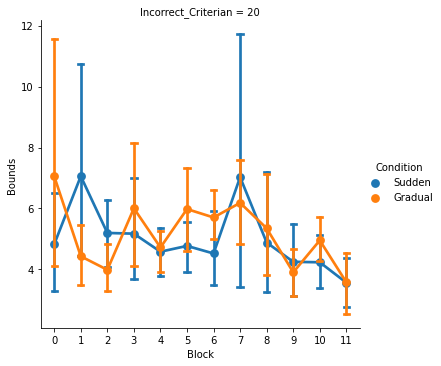

In [134]:
sns.catplot(x = 'Block', y = 'Bounds', data = df_ddm, kind='point', hue = 'Condition', ci = 95, col = 'Incorrect_Criterian', capsize = 0.2)

In [2]:
from ddm import Bound
class BoundBlocks(Bound):
    name = "constant"
    required_parameters = ["BBlock0", "BBlock1", "BBlock2", "BBlock3", "BBlock4", "BBlock5",
                          "BBlock6", "BBlock7", "BBlock8", "BBlock9", "BBlock10", "BBlock11"]
    required_conditions = ['block']
    def get_bound(self, conditions, *args, **kwargs):
        if conditions['block'] == 0:
            return self.BBlock0
        if conditions['block'] == 1:
            return self.BBlock1
        if conditions['block'] == 2:
            return self.BBlock2
        if conditions['block'] == 3:
            return self.BBlock3
        if conditions['block'] == 4:
            return self.BBlock4
        if conditions['block'] == 5:
            return self.BBlock5
        if conditions['block'] == 6:
            return self.BBlock6
        if conditions['block'] == 7:
            return self.BBlock7
        if conditions['block'] == 8:
            return self.BBlock8
        if conditions['block'] == 9:
            return self.BBlock9
        if conditions['block'] == 10:
            return self.BBlock10
        if conditions['block'] == 11:
            return self.BBlock11

In [3]:
from ddm import Drift
class DriftBlocks(Drift):
    name = "constant"
    required_parameters = ["VBlock0", "VBlock1", "VBlock2", "VBlock3", "VBlock4", "VBlock5",
                          "VBlock6", "VBlock7", "VBlock8", "VBlock9", "VBlock10", "VBlock11"]
    required_conditions = ['block']
    def get_drift(self, conditions, *args, **kwargs):
        if conditions['block'] == 0:
            return self.VBlock0
        if conditions['block'] == 1:
            return self.VBlock1
        if conditions['block'] == 2:
            return self.VBlock2
        if conditions['block'] == 3:
            return self.VBlock3
        if conditions['block'] == 4:
            return self.VBlock4
        if conditions['block'] == 5:
            return self.VBlock5
        if conditions['block'] == 6:
            return self.VBlock6
        if conditions['block'] == 7:
            return self.VBlock7
        if conditions['block'] == 8:
            return self.VBlock8
        if conditions['block'] == 9:
            return self.VBlock9
        if conditions['block'] == 10:
            return self.VBlock10
        if conditions['block'] == 11:
            return self.VBlock11

In [22]:
model_fits = np.zeros(14, dtype = object)
for participant in [5, 6, 7, 9, 12]:
    print(participant)
    df_rt = pd.read_csv(open('RTs.csv'))
    df_error = pd.read_csv(open('Angular_errors.csv'))

    df_rt['Correct'] = 0
    df_rt['Correct'][df_error['Error'] < np.pi/9] = 1
    df_rt['Correct'][df_error['Error'] > np.pi/9] = 0

    df_rt = df_rt[df_rt['participant_id'] == participant]

    df_rt = df_rt[df_rt["ITs"] > .001]
    df_rt = df_rt[df_rt["ITs"] < 5]
    df_rt = df_rt.drop(['Trial', 'Unnamed: 0', 'participant_id', 'condition', 'MTs'], axis = 1)

    samp = Sample.from_pandas_dataframe(df_rt, rt_column_name="ITs", correct_column_name="Correct")
    
    
    model = Model(bound=BoundBlocks(BBlock0 = Fittable(minval = 0, maxval = 20),
                               BBlock1 = Fittable(minval = 0, maxval = 20),
                               BBlock2 = Fittable(minval = 0, maxval = 20),
                               BBlock3 = Fittable(minval = 0, maxval = 20),
                               BBlock4 = Fittable(minval = 0, maxval = 20),
                               BBlock5 = Fittable(minval = 0, maxval = 20),
                               BBlock6 = Fittable(minval = 0, maxval = 20),
                               BBlock7 = Fittable(minval = 0, maxval = 20),
                               BBlock8 = Fittable(minval = 0, maxval = 20),
                               BBlock9 = Fittable(minval = 0, maxval = 20),
                               BBlock10 = Fittable(minval = 0, maxval = 20),
                               BBlock11 = Fittable(minval = 0, maxval = 20)),
              
              drift=DriftBlocks(VBlock0 = Fittable(minval = -20, maxval = 20),
                               VBlock1 = Fittable(minval = -20, maxval = 20),
                               VBlock2 = Fittable(minval = -20, maxval = 20),
                               VBlock3 = Fittable(minval = -20, maxval = 20),
                               VBlock4 = Fittable(minval = -20, maxval = 20),
                               VBlock5 = Fittable(minval = -20, maxval = 20),
                               VBlock6 = Fittable(minval = -20, maxval = 20),
                               VBlock7 = Fittable(minval = -20, maxval = 20),
                               VBlock8 = Fittable(minval = -20, maxval = 20),
                               VBlock9 = Fittable(minval = -20, maxval = 20),
                               VBlock10 = Fittable(minval = -20, maxval = 20),
                               VBlock11 = Fittable(minval = -20, maxval = 20)),
              
              overlay=OverlayNonDecision(nondectime=Fittable(minval=0, maxval=0.5)),
              
              noise=NoiseConstant(noise=Fittable(minval=0.01, maxval=5)), 
                               dt=0.01, dx = 0.01, T_dur = 5
             )
    model_fits[participant] = fit_adjust_model(samp, model, verbose = False, lossfunction=LossSquaredError)

5


<ipython-input-22-35855da91661>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < np.pi/9] = 1
<ipython-input-22-35855da91661>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > np.pi/9] = 0


differential_evolution step 1: f(x)= 0.27975
differential_evolution step 2: f(x)= 0.27975
differential_evolution step 3: f(x)= 0.27975
differential_evolution step 4: f(x)= 0.27975
differential_evolution step 5: f(x)= 0.276606
differential_evolution step 6: f(x)= 0.263774
differential_evolution step 7: f(x)= 0.263774
differential_evolution step 8: f(x)= 0.263774
differential_evolution step 9: f(x)= 0.263774
differential_evolution step 10: f(x)= 0.263774
differential_evolution step 11: f(x)= 0.253113
differential_evolution step 12: f(x)= 0.253113
differential_evolution step 13: f(x)= 0.253113
differential_evolution step 14: f(x)= 0.253113
differential_evolution step 15: f(x)= 0.253113
differential_evolution step 16: f(x)= 0.253113
differential_evolution step 17: f(x)= 0.253113
differential_evolution step 18: f(x)= 0.253113
differential_evolution step 19: f(x)= 0.253113
differential_evolution step 20: f(x)= 0.252568
differential_evolution step 21: f(x)= 0.247018
differential_evolution ste

Params [ 20.          19.37239586  -0.07399437 -12.1747762  -12.88588693
  -8.3251831  -11.08655875 -12.90451753   0.27175182   4.83489934
   4.74370898   2.61792756   4.0386715   17.78144693  15.14170905
   4.47365183   9.9592453   14.58481927   8.50931047  11.5504636
   9.43612761   3.9149249    2.78717769   3.25536443   3.69380573
   0.4747267 ] gave 0.2005204998625098
6


<ipython-input-22-35855da91661>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < np.pi/9] = 1
<ipython-input-22-35855da91661>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > np.pi/9] = 0


differential_evolution step 1: f(x)= 0.378351
differential_evolution step 2: f(x)= 0.378351
differential_evolution step 3: f(x)= 0.378351
differential_evolution step 4: f(x)= 0.378351
differential_evolution step 5: f(x)= 0.37642
differential_evolution step 6: f(x)= 0.369549
differential_evolution step 7: f(x)= 0.369549
differential_evolution step 8: f(x)= 0.369549
differential_evolution step 9: f(x)= 0.361135
differential_evolution step 10: f(x)= 0.358375
differential_evolution step 11: f(x)= 0.354134
differential_evolution step 12: f(x)= 0.354134
differential_evolution step 13: f(x)= 0.354134
differential_evolution step 14: f(x)= 0.354134
differential_evolution step 15: f(x)= 0.354134
differential_evolution step 16: f(x)= 0.354134
differential_evolution step 17: f(x)= 0.354134
differential_evolution step 18: f(x)= 0.354134
differential_evolution step 19: f(x)= 0.354134
differential_evolution step 20: f(x)= 0.34974
differential_evolution step 21: f(x)= 0.34974
differential_evolution st

<ipython-input-22-35855da91661>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < np.pi/9] = 1
<ipython-input-22-35855da91661>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > np.pi/9] = 0


differential_evolution step 1: f(x)= 0.385961
differential_evolution step 2: f(x)= 0.379034
differential_evolution step 3: f(x)= 0.379034
differential_evolution step 4: f(x)= 0.379034
differential_evolution step 5: f(x)= 0.379034
differential_evolution step 6: f(x)= 0.377306
differential_evolution step 7: f(x)= 0.373868
differential_evolution step 8: f(x)= 0.373868
differential_evolution step 9: f(x)= 0.373868
differential_evolution step 10: f(x)= 0.372969
differential_evolution step 11: f(x)= 0.36968
differential_evolution step 12: f(x)= 0.36968
differential_evolution step 13: f(x)= 0.36968
differential_evolution step 14: f(x)= 0.36968
differential_evolution step 15: f(x)= 0.36968
differential_evolution step 16: f(x)= 0.359539
differential_evolution step 17: f(x)= 0.359539
differential_evolution step 18: f(x)= 0.359539
differential_evolution step 19: f(x)= 0.359539
differential_evolution step 20: f(x)= 0.359539
differential_evolution step 21: f(x)= 0.359539
differential_evolution step

differential_evolution step 175: f(x)= 0.320487
differential_evolution step 176: f(x)= 0.320446
differential_evolution step 177: f(x)= 0.319905
differential_evolution step 178: f(x)= 0.319905
differential_evolution step 179: f(x)= 0.319905
differential_evolution step 180: f(x)= 0.319905
differential_evolution step 181: f(x)= 0.319905
differential_evolution step 182: f(x)= 0.319905
differential_evolution step 183: f(x)= 0.319905
differential_evolution step 184: f(x)= 0.319905
Params [ 16.38674323  11.08158194  10.72827793  -1.14186518 -16.18781936
  -8.76355514  -7.99164147  -5.05600299 -14.89800621  11.76362922
  -0.54470564  20.           2.68044232  14.67454749   9.87973491
   9.9671749    2.43346317  12.52806287   7.01999018   7.11637794
   4.88673337  14.42032275  10.84023909   2.95529129  16.01384103
   0.3785119 ] gave 0.3092956473641623
9


<ipython-input-22-35855da91661>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < np.pi/9] = 1
<ipython-input-22-35855da91661>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > np.pi/9] = 0


differential_evolution step 1: f(x)= 0.269092
differential_evolution step 2: f(x)= 0.269092
differential_evolution step 3: f(x)= 0.266049
differential_evolution step 4: f(x)= 0.255852
differential_evolution step 5: f(x)= 0.255852
differential_evolution step 6: f(x)= 0.255852
differential_evolution step 7: f(x)= 0.255852
differential_evolution step 8: f(x)= 0.255852
differential_evolution step 9: f(x)= 0.253866
differential_evolution step 10: f(x)= 0.253217
differential_evolution step 11: f(x)= 0.253217
differential_evolution step 12: f(x)= 0.253217
differential_evolution step 13: f(x)= 0.253217
differential_evolution step 14: f(x)= 0.246743
differential_evolution step 15: f(x)= 0.245986
differential_evolution step 16: f(x)= 0.245986
differential_evolution step 17: f(x)= 0.245986
differential_evolution step 18: f(x)= 0.245986
differential_evolution step 19: f(x)= 0.245986
differential_evolution step 20: f(x)= 0.243793
differential_evolution step 21: f(x)= 0.243793
differential_evolution

<ipython-input-22-35855da91661>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] < np.pi/9] = 1
<ipython-input-22-35855da91661>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['Correct'][df_error['Error'] > np.pi/9] = 0


differential_evolution step 1: f(x)= 0.271699
differential_evolution step 2: f(x)= 0.260219
differential_evolution step 3: f(x)= 0.243909
differential_evolution step 4: f(x)= 0.243909
differential_evolution step 5: f(x)= 0.243909
differential_evolution step 6: f(x)= 0.243737
differential_evolution step 7: f(x)= 0.223985
differential_evolution step 8: f(x)= 0.223985
differential_evolution step 9: f(x)= 0.223985
differential_evolution step 10: f(x)= 0.223985
differential_evolution step 11: f(x)= 0.223985
differential_evolution step 12: f(x)= 0.223985
differential_evolution step 13: f(x)= 0.223985
differential_evolution step 14: f(x)= 0.223985
differential_evolution step 15: f(x)= 0.223985
differential_evolution step 16: f(x)= 0.223985
differential_evolution step 17: f(x)= 0.223985
differential_evolution step 18: f(x)= 0.223985
differential_evolution step 19: f(x)= 0.223062
differential_evolution step 20: f(x)= 0.223062
differential_evolution step 21: f(x)= 0.22294
differential_evolution 

In [33]:
model_fits_ = pickle.load(open('pyddm_fits.pickle', 'rb'))

In [57]:
pickle.dump(model_fits_, open('pyddm_fits1.pickle', 'wb'))

In [58]:
fits = pickle.load(open('pyddm_fits1.pickle', 'rb'))

In [86]:
fits[13].get_model_parameters()[13].real

5.245067663181991

In [88]:
drift_rates = np.zeros((14, 12))
bounds = np.zeros((14, 12))
drift_noise = np.zeros(14)
Ter = np.zeros(14)
for participant in range(14):
    for block in range(12):
        drift_rates[participant][block] = fits[participant].get_model_parameters()[block].real
        bounds[participant][block] = fits[participant].get_model_parameters()[block+13].real 
        
    
    Ter[participant] = fits[participant].get_model_parameters()[12].real
    drift_noise[participant] = fits[participant].get_model_parameters()[25].real


In [89]:
incorrect_thresold = [np.pi/9]
df_ddm = pd.DataFrame({'Condition': np.tile(np.ravel(np.array([np.repeat(['Sudden'], 12*len(incorrect_thresold)), np.repeat(['Gradual'], 12*len(incorrect_thresold))])), 7),
                       'Block': np.tile(np.repeat(np.arange(12), len(incorrect_thresold)), 14),
                      'Drift_Rates': np.ravel(drift_rates),
                       
                       'Incorrect_Criterian':np.tile(np.array([20]), 12*14),
                      'Bounds': np.ravel(bounds),
                    })

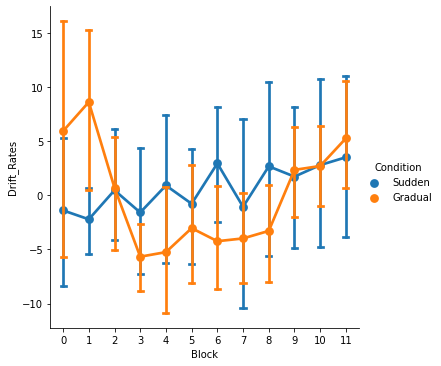

In [108]:
sns.catplot(x = 'Block', y = 'Drift_Rates', hue = 'Condition', data = df_ddm, kind = 'point', capsize = 0.2)

In [74]:
import pickle
pickle.dump(model_fits, open('ddm_model_point_fits.pickle', 'wb'))

# Using HDDMs

In [111]:
import hddm

C:\Users\Tejas\anaconda3\lib\site-packages\IPython\parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [3]:
df_rt = hddm.load_csv('RTs.csv')

In [4]:
df_rt = df_rt.drop(['Unnamed: 0', 'MTs'], axis = 1)
df_error = pd.read_csv(open('Angular_errors.csv'))

df_rt['response'] = 0
df_rt['response'][df_error['Error'] < np.pi/9] = 1
df_rt['response'][df_error['Error'] > np.pi/9] = 0



<ipython-input-4-f9c3b37dc88a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['response'][df_error['Error'] < np.pi/9] = 1
<ipython-input-4-f9c3b37dc88a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rt['response'][df_error['Error'] > np.pi/9] = 0


In [5]:
df_rt = df_rt.rename(columns={'participant_id': 'subj_idx', 'ITs':'rt'})


In [3]:
model = hddm.load('hddm_fit')

False

TypeError: iteration over a 0-d array

<Figure size 432x288 with 0 Axes>

In [59]:
m.sample(2000, burn = 20)

 [-----------------100%-----------------] 2000 of 2000 complete in 460.4 sec

In [60]:
stats = m.gen_stats()

In [62]:
stats[stats.index.isin(['a', 'a_std', 'a_subj.0', 'a_subj.1'])]


,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,2.13484,0.194851,1.78852,2.00406,2.12462,2.24595,2.5731,0.00693227
a_std,0.726409,0.183406,0.455013,0.596192,0.694274,0.831464,1.17195,0.00860781
a_subj.0,1.97159,0.0450135,1.88241,1.9412,1.97107,2.00136,2.05996,0.00141201
a_subj.1,2.33866,0.0607831,2.22544,2.29638,2.33684,2.37999,2.46379,0.002478


Plotting a
Plotting a_std
Plotting v
Plotting t


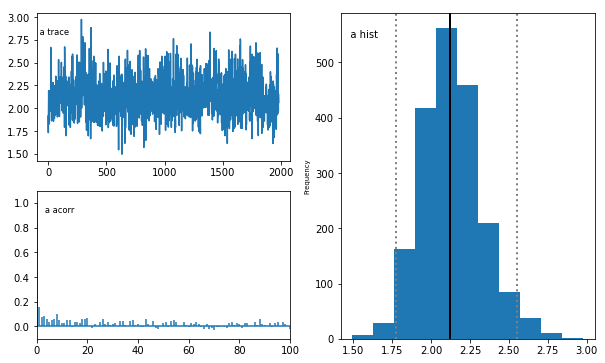

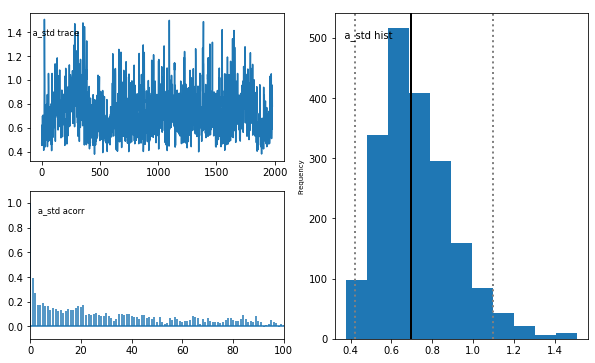

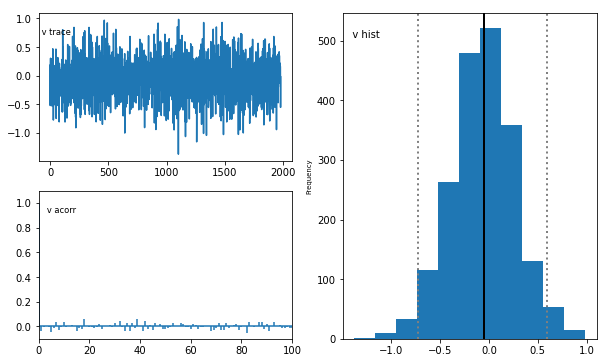

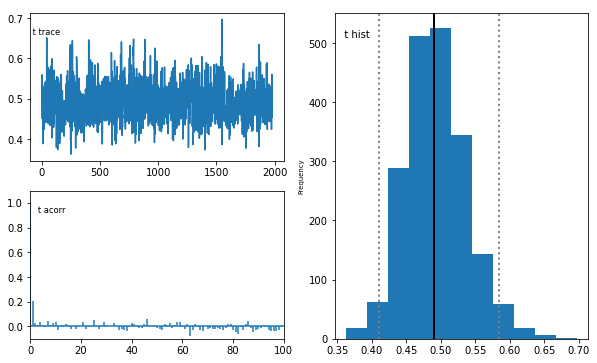

In [63]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])


In [152]:
m_stim = hddm.HDDM(df_rt, depends_on={'v': ['block', 'condition'], 'a':['block', 'condition']})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000, dbname = 'traces.db', db = 'pickle')
m_stim.save('hddm_fit')

non_hierarchical_model = hddm.HDDM(df_rt, depends_on={'v': ['block', 'condition'], 'a':['block', 'condition']}, is_group_model = False)
non_hierarchical_model.find_starting_values()
non_hierarchical_model.sample(10000, burn=1000, dbname = 'traces.db', db = 'pickle')
non_hierarchical_model.save('nhddm_fit')

 [-----------------100%-----------------] 10000 of 10000 complete in 5300.2 sec-17191.38500230904
-17191.321958238004
 [-----------------100%-----------------] 10000 of 10000 complete in 1313.5 sec-------------   38%                  ] 3813 of 10000 complete in 505.2 sec

In [148]:
m_stim.dbname = 'traces.db'
m_stim.db = 'pickle'

In [151]:
m_stim.

,subj_idx,condition,Trial,rt,block,response
0,0,Sudden,0,-0.000074,0,0
1,1,Gradual,0,-0.000075,0,0
2,2,Sudden,0,-0.000134,0,0
3,3,Gradual,0,0.883418,0,1
4,4,Sudden,0,-0.920651,0,0
...,...,...,...,...,...,...
10747,9,Gradual,767,0.780795,11,1
10748,10,Sudden,767,0.733294,11,1
10749,11,Gradual,767,-1.200126,11,0
10750,12,Sudden,767,0.560747,11,1


In [115]:
m_stim = hddm.load('hddm_fit')

In [130]:
v_gradual = m_stim.nodes_db.node[['v(0.Gradual)', 'v(1.Gradual)', 'v(2.Gradual)', 'v(3.Gradual)', 'v(4.Gradual)', 'v(5.Gradual)',
                                'v(6.Gradual)', 'v(7.Gradual)', 'v(8.Gradual)', 'v(9.Gradual)', 'v(10.Gradual)', 'v(11.Gradual)']]

In [131]:
v_sudden = m_stim.nodes_db.node[['v(0.Sudden)', 'v(1.Sudden)', 'v(2.Sudden)', 'v(3.Sudden)', 'v(4.Sudden)', 'v(5.Sudden)',
                                'v(6.Sudden)', 'v(7.Sudden)', 'v(8.Sudden)', 'v(9.Sudden)', 'v(10.Sudden)', 'v(11.Sudden)']]

In [127]:
a_gradual = m_stim.nodes_db.node[['a(0.Gradual)', 'a(1.Gradual)', 'a(2.Gradual)', 'a(3.Gradual)', 'a(4.Gradual)', 'a(5.Gradual)',
                                'a(6.Gradual)', 'a(7.Gradual)', 'a(8.Gradual)', 'a(9.Gradual)', 'a(10.Gradual)', 'a(11.Gradual)']]

In [128]:
a_sudden = m_stim.nodes_db.node[['a(0.Sudden)', 'a(1.Sudden)', 'a(2.Sudden)', 'a(3.Sudden)', 'a(4.Sudden)', 'a(5.Sudden)',
                                'a(6.Sudden)', 'a(7.Sudden)', 'a(8.Sudden)', 'a(9.Sudden)', 'a(10.Sudden)', 'a(11.Sudden)']]

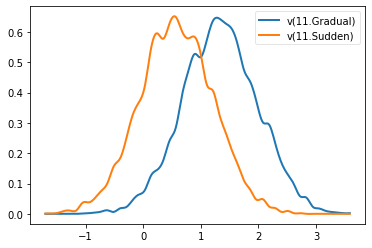

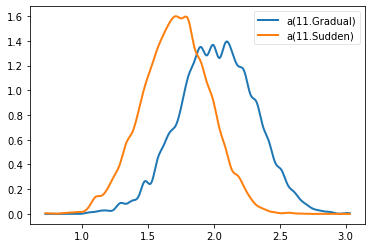

In [128]:
block = 11
vblock = m_stim.nodes_db.node[['v('+str(block)+'.Gradual)', 'v('+str(block)+'.Sudden)']]
ablock = m_stim.nodes_db.node[['a('+str(block)+'.Gradual)', 'a('+str(block)+'.Sudden)']]
hddm.analyze.plot_posterior_nodes(vblock),
hddm.analyze.plot_posterior_nodes(ablock)

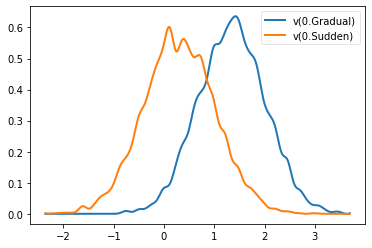

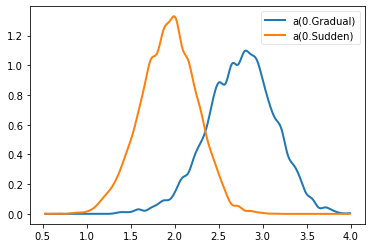

In [ ]:
ppc_data.head(10)

In [36]:
non_hierarchical_model = hddm.HDDM(df_rt, depends_on={'v': ['block', 'condition'], 'a':['block', 'condition']}, is_group_model = False)
non_hierarchical_model.find_starting_values()
non_hierarchical_model.sample(10000, burn=1000)

-17191.336388660362
-17191.31484475386
Halting at iteration  1620  of  10000   ] 1618 of 10000 complete in 217.6 sec


In [140]:
m_stim.sample(5000, dbname = 'traces.db', db = 'pickle')

 [                  0%                  ] 10 of 5000 complete in 6.8 secHalting at iteration  9  of  5000


In [84]:
stats.to_csv('hddm_fits.csv')

In [5]:
s = pd.read_csv('hddm_fits.csv')

In [8]:
list(s['Unnamed: 0'])

['a(0.Gradual)',
 'a(0.Sudden)',
 'a(1.Gradual)',
 'a(1.Sudden)',
 'a(2.Gradual)',
 'a(2.Sudden)',
 'a(3.Gradual)',
 'a(3.Sudden)',
 'a(4.Gradual)',
 'a(4.Sudden)',
 'a(5.Gradual)',
 'a(5.Sudden)',
 'a(6.Gradual)',
 'a(6.Sudden)',
 'a(7.Gradual)',
 'a(7.Sudden)',
 'a(8.Gradual)',
 'a(8.Sudden)',
 'a(9.Gradual)',
 'a(9.Sudden)',
 'a(10.Gradual)',
 'a(10.Sudden)',
 'a(11.Gradual)',
 'a(11.Sudden)',
 'a_std',
 'a_subj(0.Gradual).1',
 'a_subj(0.Gradual).3',
 'a_subj(0.Gradual).5',
 'a_subj(0.Gradual).7',
 'a_subj(0.Gradual).9',
 'a_subj(0.Gradual).11',
 'a_subj(0.Gradual).13',
 'a_subj(0.Sudden).0',
 'a_subj(0.Sudden).2',
 'a_subj(0.Sudden).4',
 'a_subj(0.Sudden).6',
 'a_subj(0.Sudden).8',
 'a_subj(0.Sudden).10',
 'a_subj(0.Sudden).12',
 'a_subj(1.Gradual).1',
 'a_subj(1.Gradual).3',
 'a_subj(1.Gradual).5',
 'a_subj(1.Gradual).7',
 'a_subj(1.Gradual).9',
 'a_subj(1.Gradual).11',
 'a_subj(1.Gradual).13',
 'a_subj(1.Sudden).0',
 'a_subj(1.Sudden).2',
 'a_subj(1.Sudden).4',
 'a_subj(1.Sudden)

In [43]:
s[s['Unnamed: 0'] == 'a_subj(2.Gradual).1']

,Unnamed: 0,mean,std,2.5q,25q,50q,75q,97.5q,mc err
53,a_subj(2.Gradual).1,2.142611,0.124073,1.907156,2.056376,2.137411,2.223425,2.396321,0.001848


In [39]:
s[s['Unnamed: 0'] == 'a(2.Sudden)']

,Unnamed: 0,mean,std,2.5q,25q,50q,75q,97.5q,mc err
5,a(2.Sudden),2.591098,0.328239,1.929537,2.376166,2.592523,2.812906,3.227496,0.003753
